In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import statsmodels.formula.api as smf
from plotnine import *
pd.options.mode.chained_assignment = None
import statsmodels.formula.api as smf
energy = pd.read_csv("https://data.cityofnewyork.us/api/views/usc3-8zwd/rows.csv?accessType=DOWNLOAD")
pd.set_option('display.max_columns', None)
ghg = gpd.read_file("../data/ghg_processed.geojson").dropna()

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_91040/4133227785.py:11: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.


In [68]:
energy['BBL'] = energy['NYC Borough, Block and Lot (BBL)'].str.replace('-', '')


In [69]:
colors =  ["#00a5bd", "#e6e6e6", "#f5d855", "#ff8e52", "#000000"]

In [70]:
ghg["exceeds_2024_limit"].mean()

0.13973907129165894

In [71]:
ghg["bottom_quint_unit"] = ghg["unit_co2_quintile"] == '5'
ghg["top_quint_unit"] = ghg["unit_co2_quintile"] == '1'

In [72]:
ghg["bottom_quint"] = ghg["efficiency_quintile"] == '5'
ghg["top_quint"] = ghg["efficiency_quintile"] == '1'

In [73]:
# Define the correct order for your categories
ordered_categories = ['< 650', '650 - 1000', '1000 - 1250', '1250+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['apt_size_cat'] = pd.Categorical(ghg['apt_size_cat'], categories=ordered_categories, ordered=True)

In [61]:
# Define the correct order for your categories
ordered_categories = ['<30k', '30k-75k', '75k-125k', '125k-175k', '175k+']

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['income_bin'] = pd.Categorical(ghg['income_bin'], categories=ordered_categories, ordered=True)

In [62]:
# Define the correct order for your categories
ordered_categories = ['< 400', '400 - 600', '600 - 1000', '1000 - 1700', '1700 +']
bins = [-np.Inf, 400, 600, 1000, 1700, np.Inf]

# Convert the 'apt_size_cat' column to an ordered categorical type
ghg['price_sqft_cat'] = pd.cut(ghg['value_per_sqft'], bins = bins, labels = ordered_categories, ordered=True)

In [63]:
ghg.columns

Index(['bbl', 'name', 'property id', 'total_units', 'eui', 'bedrooms',
       'housing_fa', 'total_fa', 'co2_intensity', 'total_co2', 'latitude',
       'longitude', 'year_built', 'occupancy', 'direct_emissions',
       'indirect_emissions', 'total_e', 'avg_apt_size', 'e_per_apt',
       'co2_tons_sq', 'co2_per_apt', 'co2_per_bedroom', 'exceeds_2024_limit',
       'exceeds_2030_limit', 'decade_built', 'bedrooms_per_apt',
       'sqft_per_bedroom', 'direct_emission_pct', 'efficiency_quintile',
       'unit_co2_quintile', 'bedroom_co2_quintile', 'limit_category',
       'apt_size_cat', 'sqft_bedroom_cat', 'state', 'county', 'tract',
       'total_population', 'pop_in_poverty', 'pop_black', 'pop_hispanic',
       'med_hh_inc', 'geoid', 'income_bin', 'income_q', 'total_energy',
       'total_emissions', 'district_steam_emissions_pct',
       'natural_gas_emissions_pct', 'electricity_emissions_pct',
       'fuel_oil_emissions_pct', 'fuel_oil_energy_pct',
       'district_steam_energy_pct', 

In [64]:
52941.0 / 57.0

928.7894736842105

In [66]:
ghg.query("bottom_quint_unit")["bottom_quint"].mean()

0.4978107106769956

In [48]:
ghg.query("avg_apt_size > 2500").sample(10)

,bbl,name,property id,total_units,eui,bedrooms,housing_fa,total_fa,co2_intensity,total_co2,latitude,longitude,year_built,occupancy,direct_emissions,indirect_emissions,total_e,avg_apt_size,e_per_apt,co2_tons_sq,co2_per_apt,co2_per_bedroom,exceeds_2024_limit,exceeds_2030_limit,decade_built,bedrooms_per_apt,sqft_per_bedroom,direct_emission_pct,efficiency_quintile,unit_co2_quintile,bedroom_co2_quintile,limit_category,apt_size_cat,sqft_bedroom_cat,state,county,tract,total_population,pop_in_poverty,pop_black,pop_hispanic,med_hh_inc,geoid,income_bin,income_q,total_energy,total_emissions,district_steam_emissions_pct,natural_gas_emissions_pct,electricity_emissions_pct,fuel_oil_emissions_pct,fuel_oil_energy_pct,district_steam_energy_pct,natural_gas_energy_pct,electricity_energy_pct,yearalter1,yearalter2,assesstot,ever_altered,altered_twice_or_more,value_per_apt,value_per_sqft,geometry
12195,1000920003,165 William Street,12053299,12.0,86.0,28.0,31100.0,31100.0,5.1,160.2,40.710185,-74.005829,1908,100,111.4,48.8,2674600.0,2591.666667,222883.333333,0.0051,13.217500,5.664643,False,True,1900,2.333333,1110.714286,0.695381,3,5,5,Exceeds 2030 limit,2000 +,1000 +,36,061,001501,7560,0.089021,0.042857,0.074339,103102.0,36061001501,75k-125k,7,2673885.1,160.234342,0.000000,0.694989,0.305011,0.000000,0.000000,0.000000,0.784177,0.215823,2008.0,0.0,2754900.0,True,False,3.826250e+06,1476.366559,POINT (-74.00583 40.71019)
5310,1013900003,DEPM 1524 - 944 Fifth Ave,2674022,14.0,68.8,95.0,77800.0,77800.0,5.0,386.7,40.774723,-73.965368,1925,100,5.2,381.6,5352640.0,5557.142857,382331.428571,0.0050,27.785714,4.094737,False,True,1920,6.785714,818.947368,0.013447,3,5,4,Exceeds 2030 limit,2000 +,750 - 1000,36,061,013000,3581,0.012287,0.005306,0.054175,204485.0,36061013000,175k+,9,5355327.4,312.553340,0.498588,0.016601,0.484810,0.000000,0.000000,0.647655,0.018244,0.334101,1984.0,2009.0,9895050.0,True,True,1.177982e+07,2119.762211,POINT (-73.96537 40.77472)
5295,1013910072,955 Fifth Ave,2670604,31.0,27.2,65.0,78000.0,80000.0,2.1,166.8,40.775466,-73.964830,1938,100,29.4,137.5,2176000.0,2516.129032,70193.548387,0.0021,5.419355,2.584615,False,False,1930,2.096774,1200.000000,0.176259,1,3,2,Below both limits,2000 +,1000 +,36,061,013000,3581,0.012287,0.005306,0.054175,204485.0,36061013000,175k+,9,2178976.3,167.079913,0.000000,0.175720,0.824280,0.000000,0.000000,0.000000,0.253697,0.746303,2013.0,0.0,8199900.0,True,False,4.408548e+06,1708.312500,POINT (-73.96483 40.77547)
5079,1015090016,133 East 80th St,2670011,21.0,71.7,64.0,80711.0,82291.0,5.5,455.4,40.775832,-73.958832,1930,100,300.5,154.9,5900264.7,3843.380952,280964.985714,0.0055,21.552405,7.071883,False,True,1930,3.047619,1261.109375,0.659859,4,5,5,Exceeds 2030 limit,2000 +,1000 +,36,061,014000,7224,0.047619,0.009136,0.034192,123607.0,36061014000,75k-125k,8,5900116.8,455.691814,0.000000,0.007494,0.340505,0.652001,0.678572,0.000000,0.010898,0.310530,0.0,0.0,9580950.0,False,False,7.603929e+06,1940.461290,POINT (-73.95883 40.77583)
10843,1012370061,(5611) - 610 West End Ave,2638875,47.0,105.2,160.0,173300.0,178300.0,6.1,1089.1,40.791076,-73.975739,1912,100,839.6,249.5,18757160.0,3687.234043,399088.510638,0.0061,23.141064,6.797688,False,True,1910,3.404255,1083.125000,0.770912,4,5,5,Exceeds 2030 limit,2000 +,1000 +,36,061,017500,10255,0.034227,0.044759,0.191029,143609.0,36061017500,125k-175k,8,18759033.9,1089.501451,0.000000,0.770569,0.229431,0.000000,0.000000,0.000000,0.842661,0.157339,1988.0,0.0,11546550.0,True,False,4.094521e+06,1079.318564,POINT (-73.97574 40.79108)
3772,1001890030,"20-26 North Moore Street, New York",4409206,20.0,50.4,38.0,66918.0,66918.0,3.0,202.7,40.719811,-74.007229,1921,100,139.2,63.5,3372667.2,3345.900000,168633.360000,0.0030,10.037700,5.283000,False,False,1920,1.900000,1761.000000,0.686729,1,5,5,Below both limits,2000 +,1000 +,36,061,003300,5841,0.009587,0.012498,0.066769,250001.0,36061003300,175k+,9,3372382.7,202.829528,0.000000,0.686349,0.313651,0.000000,0.000000,0.000000,0.777255,0.222745,19

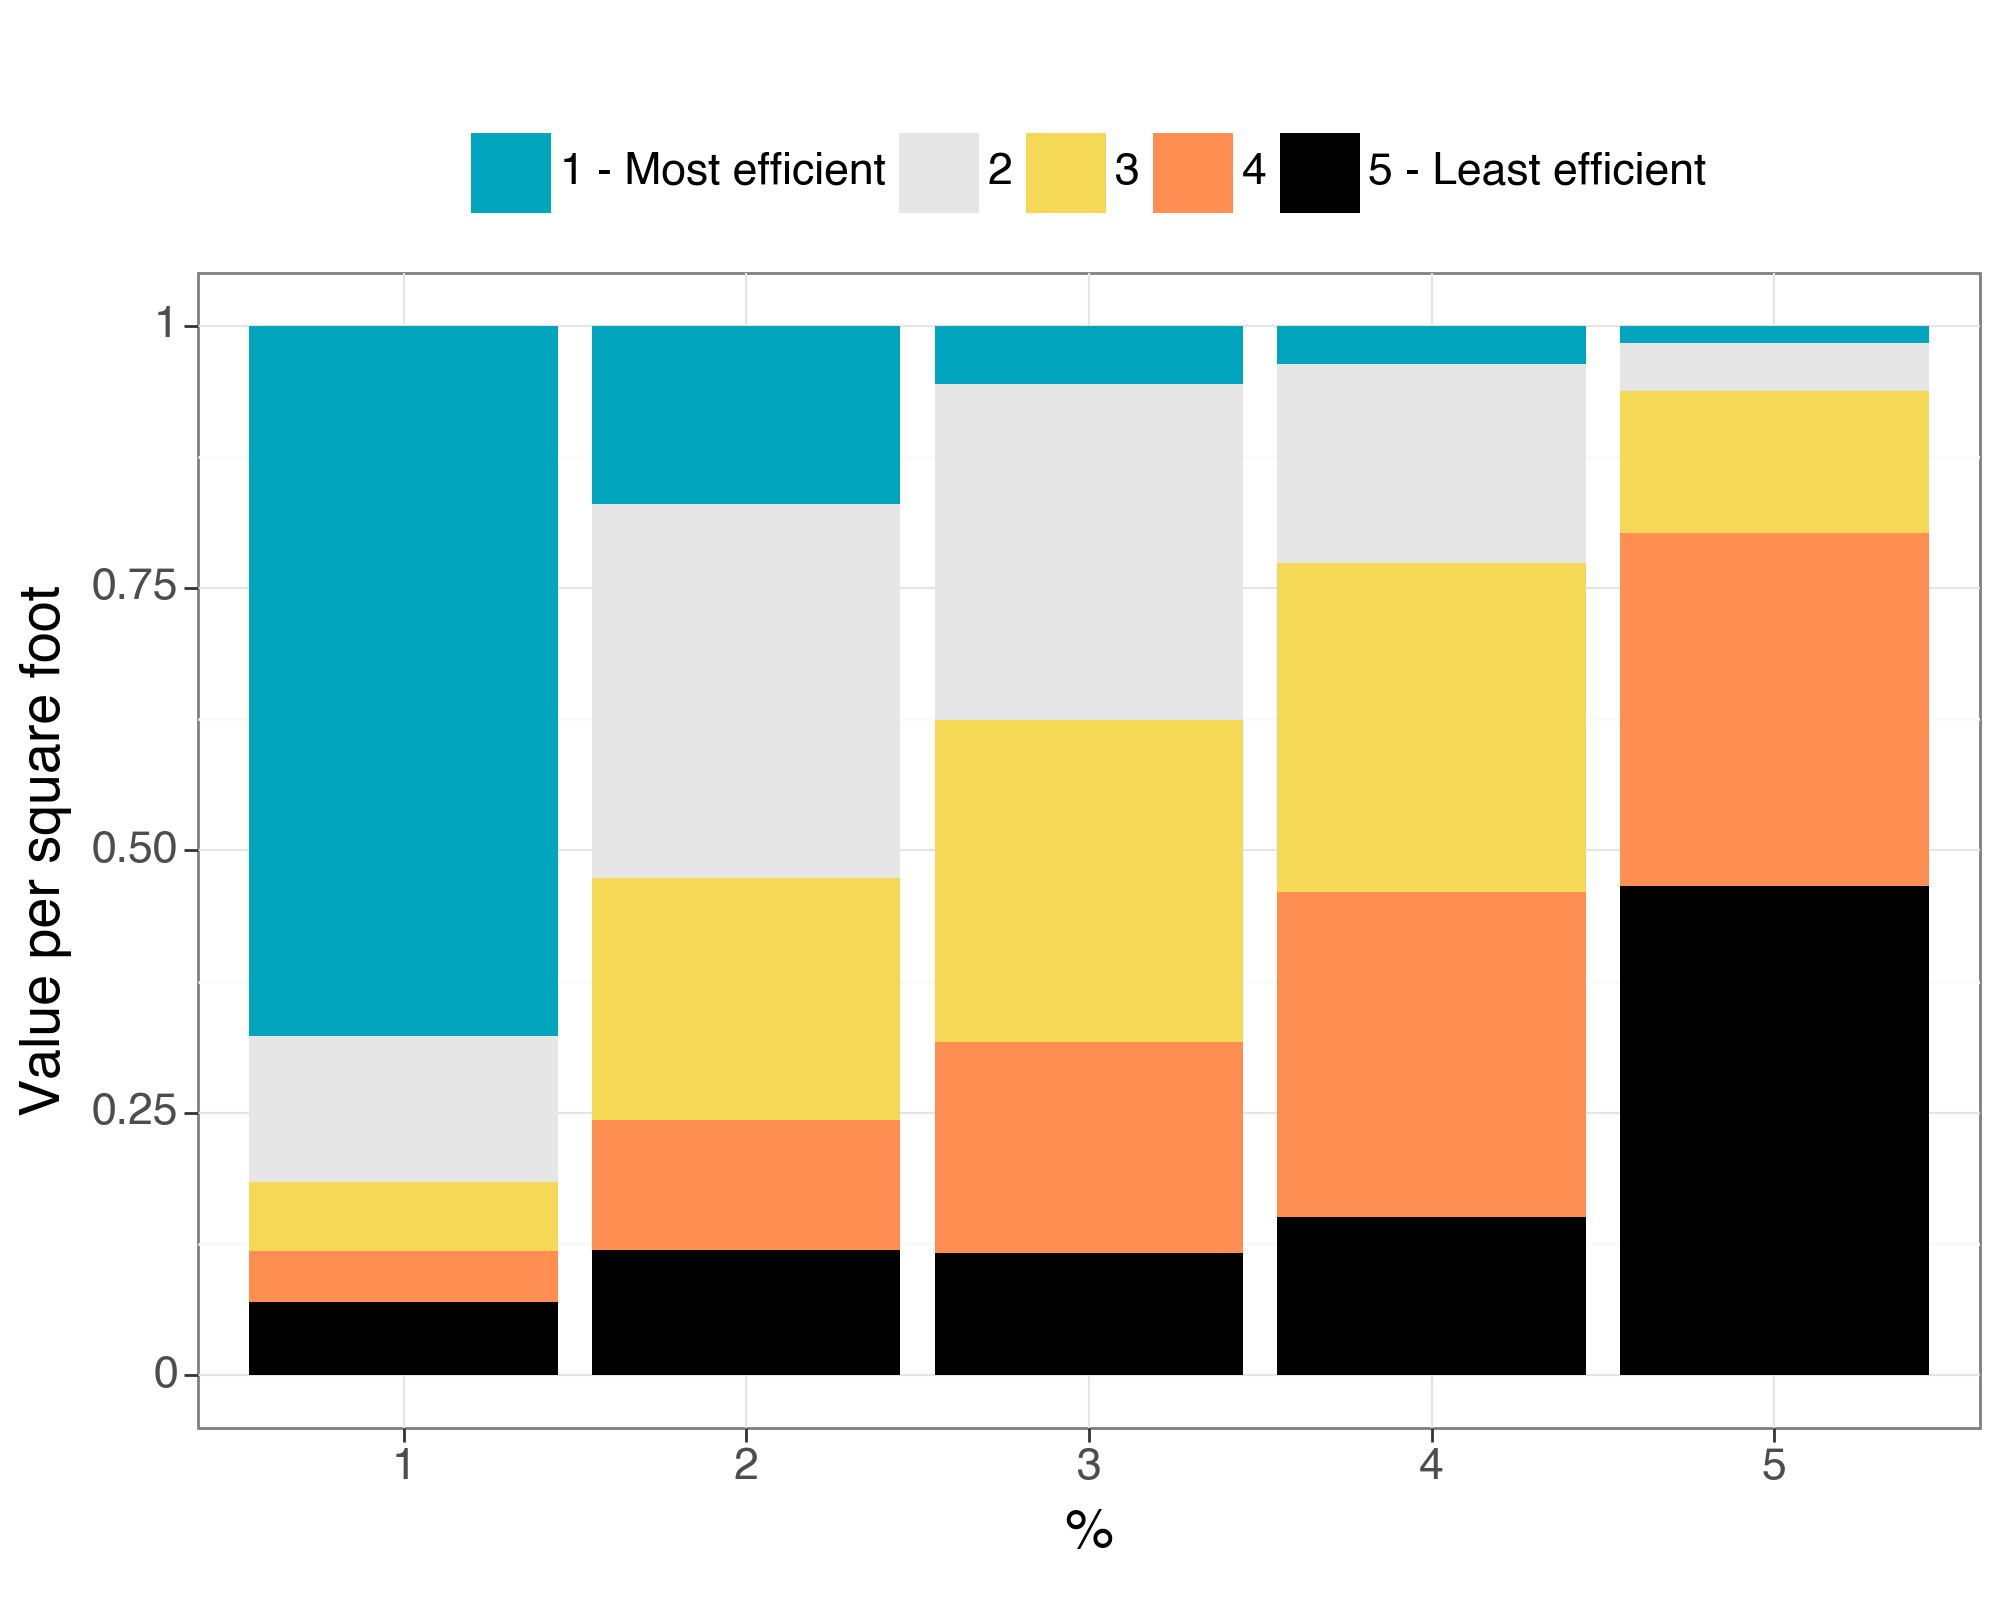

<Figure Size: (1000 x 800)>

In [34]:
(ggplot(ghg, aes(fill = "unit_co2_quintile", x = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "Value per square foot", x = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

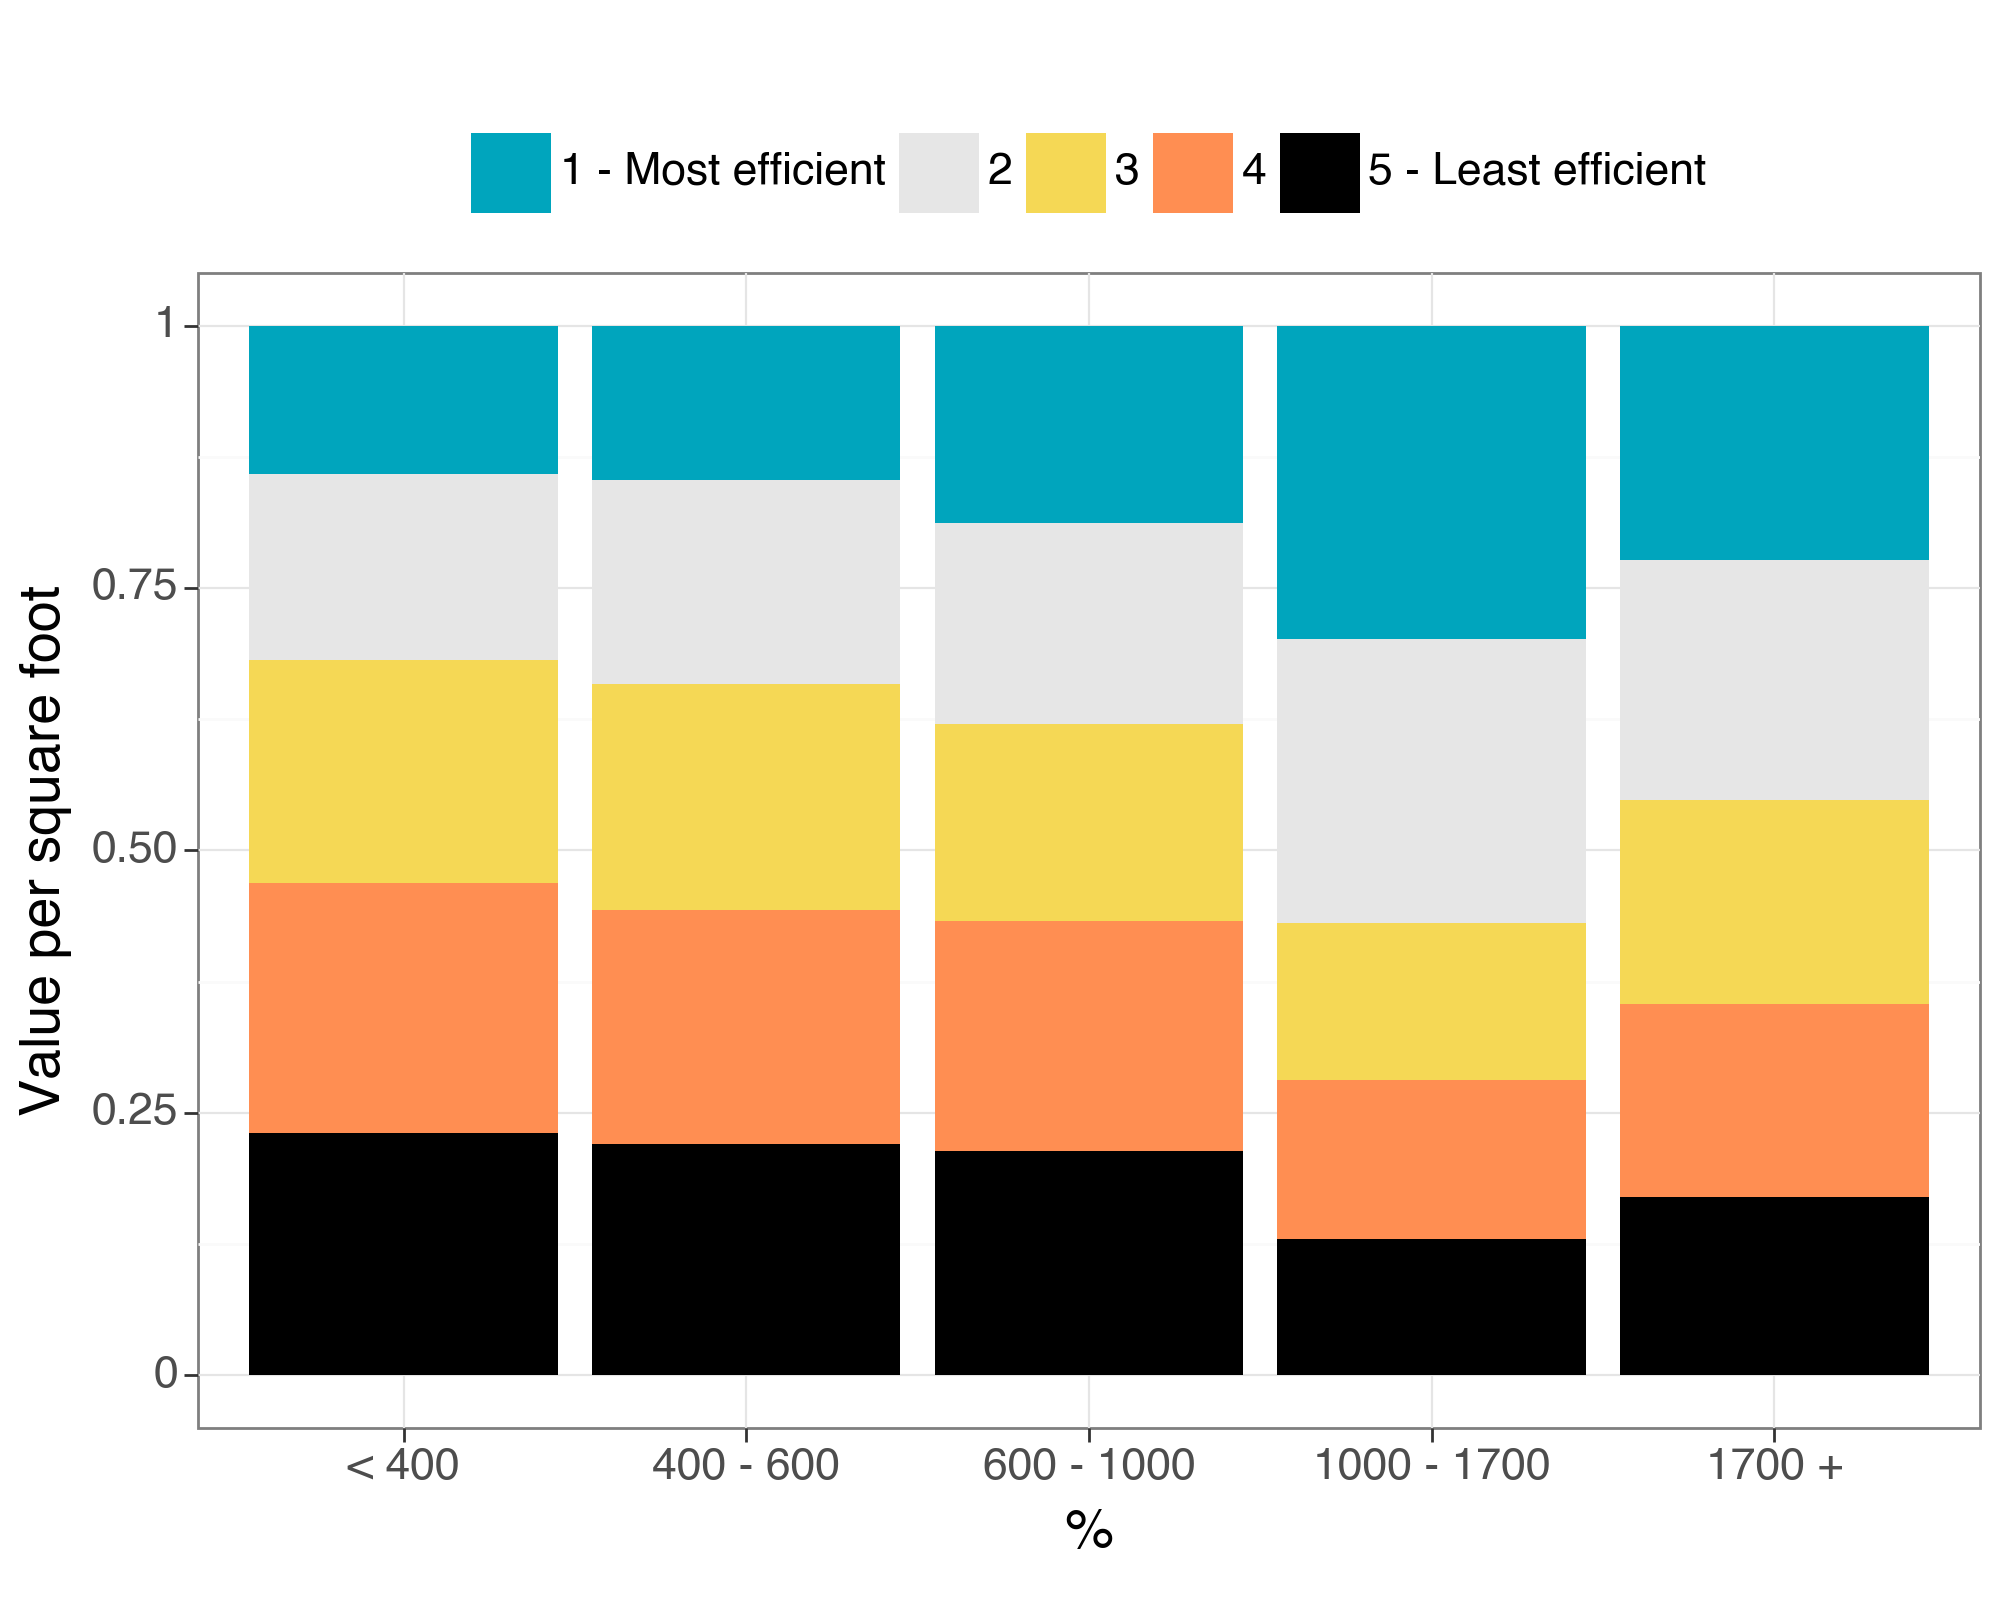

<Figure Size: (1000 x 800)>

In [10]:
(ggplot(ghg, aes(x = "price_sqft_cat", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "Value per square foot", x = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

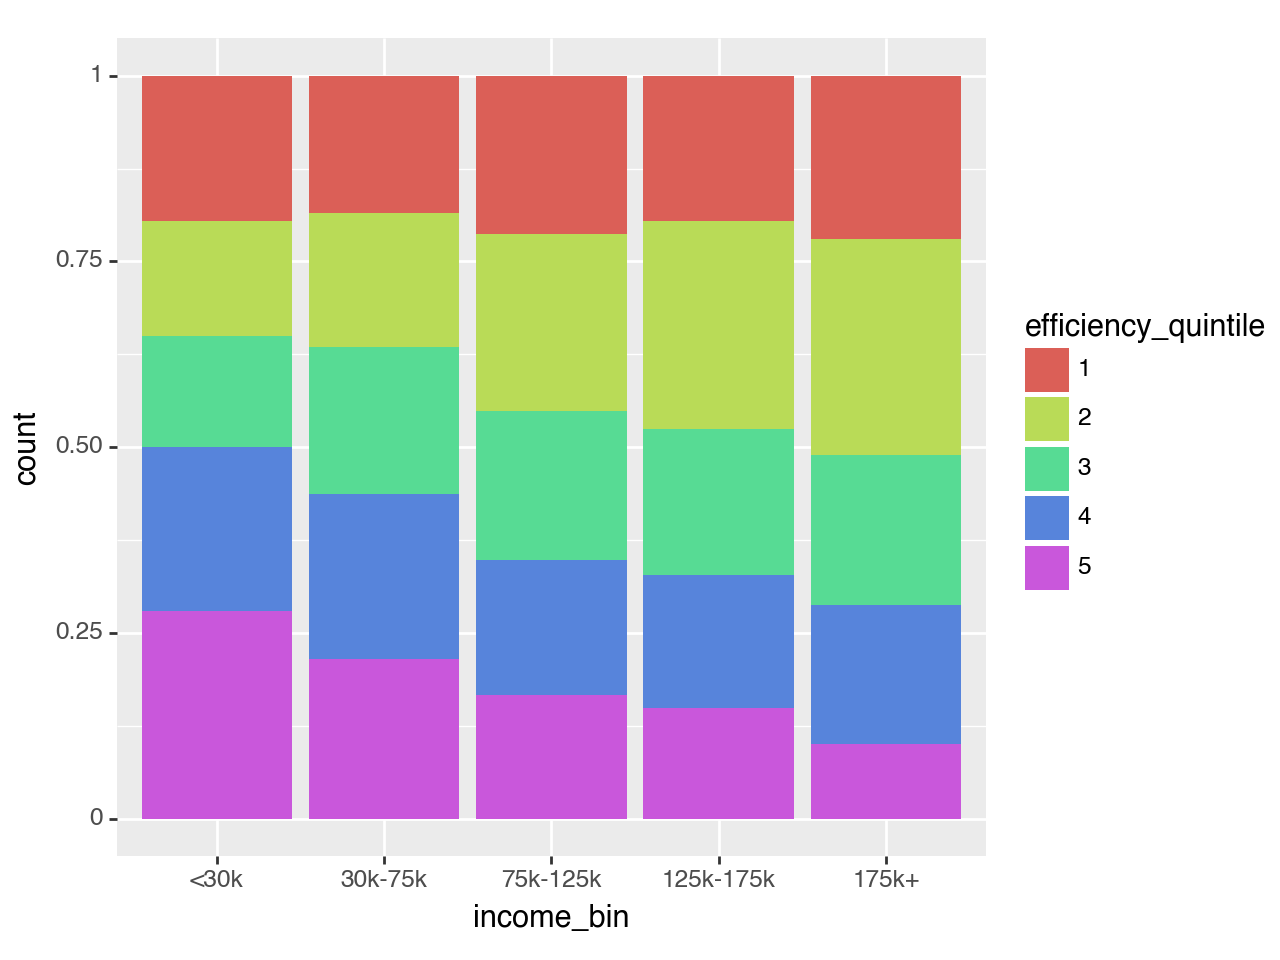

<Figure Size: (640 x 480)>

In [11]:
(ggplot(ghg, aes(x = "income_bin", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill"))

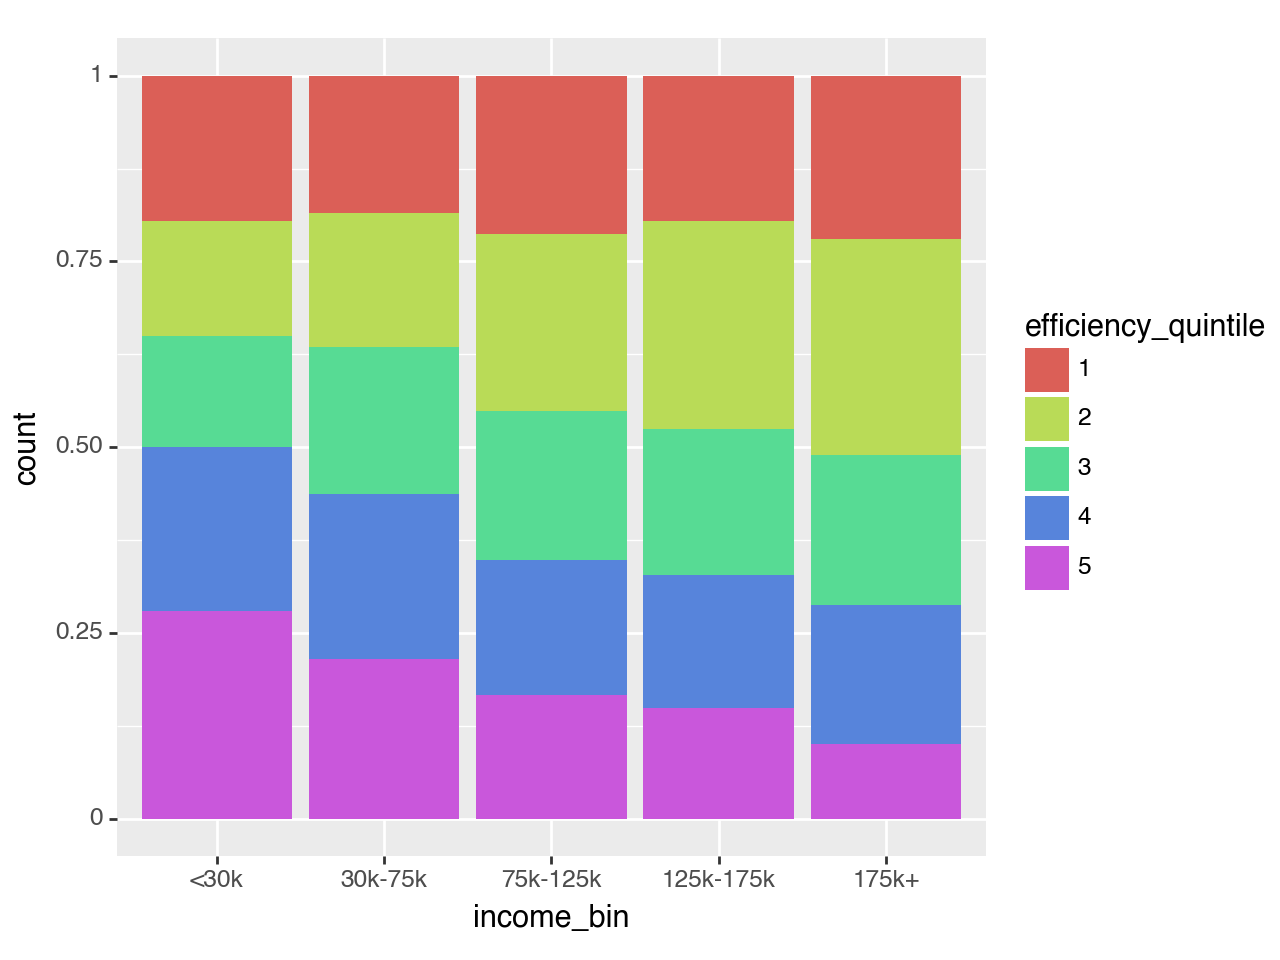

<Figure Size: (640 x 480)>

In [12]:
(ggplot(ghg, aes(x = "income_bin", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill"))

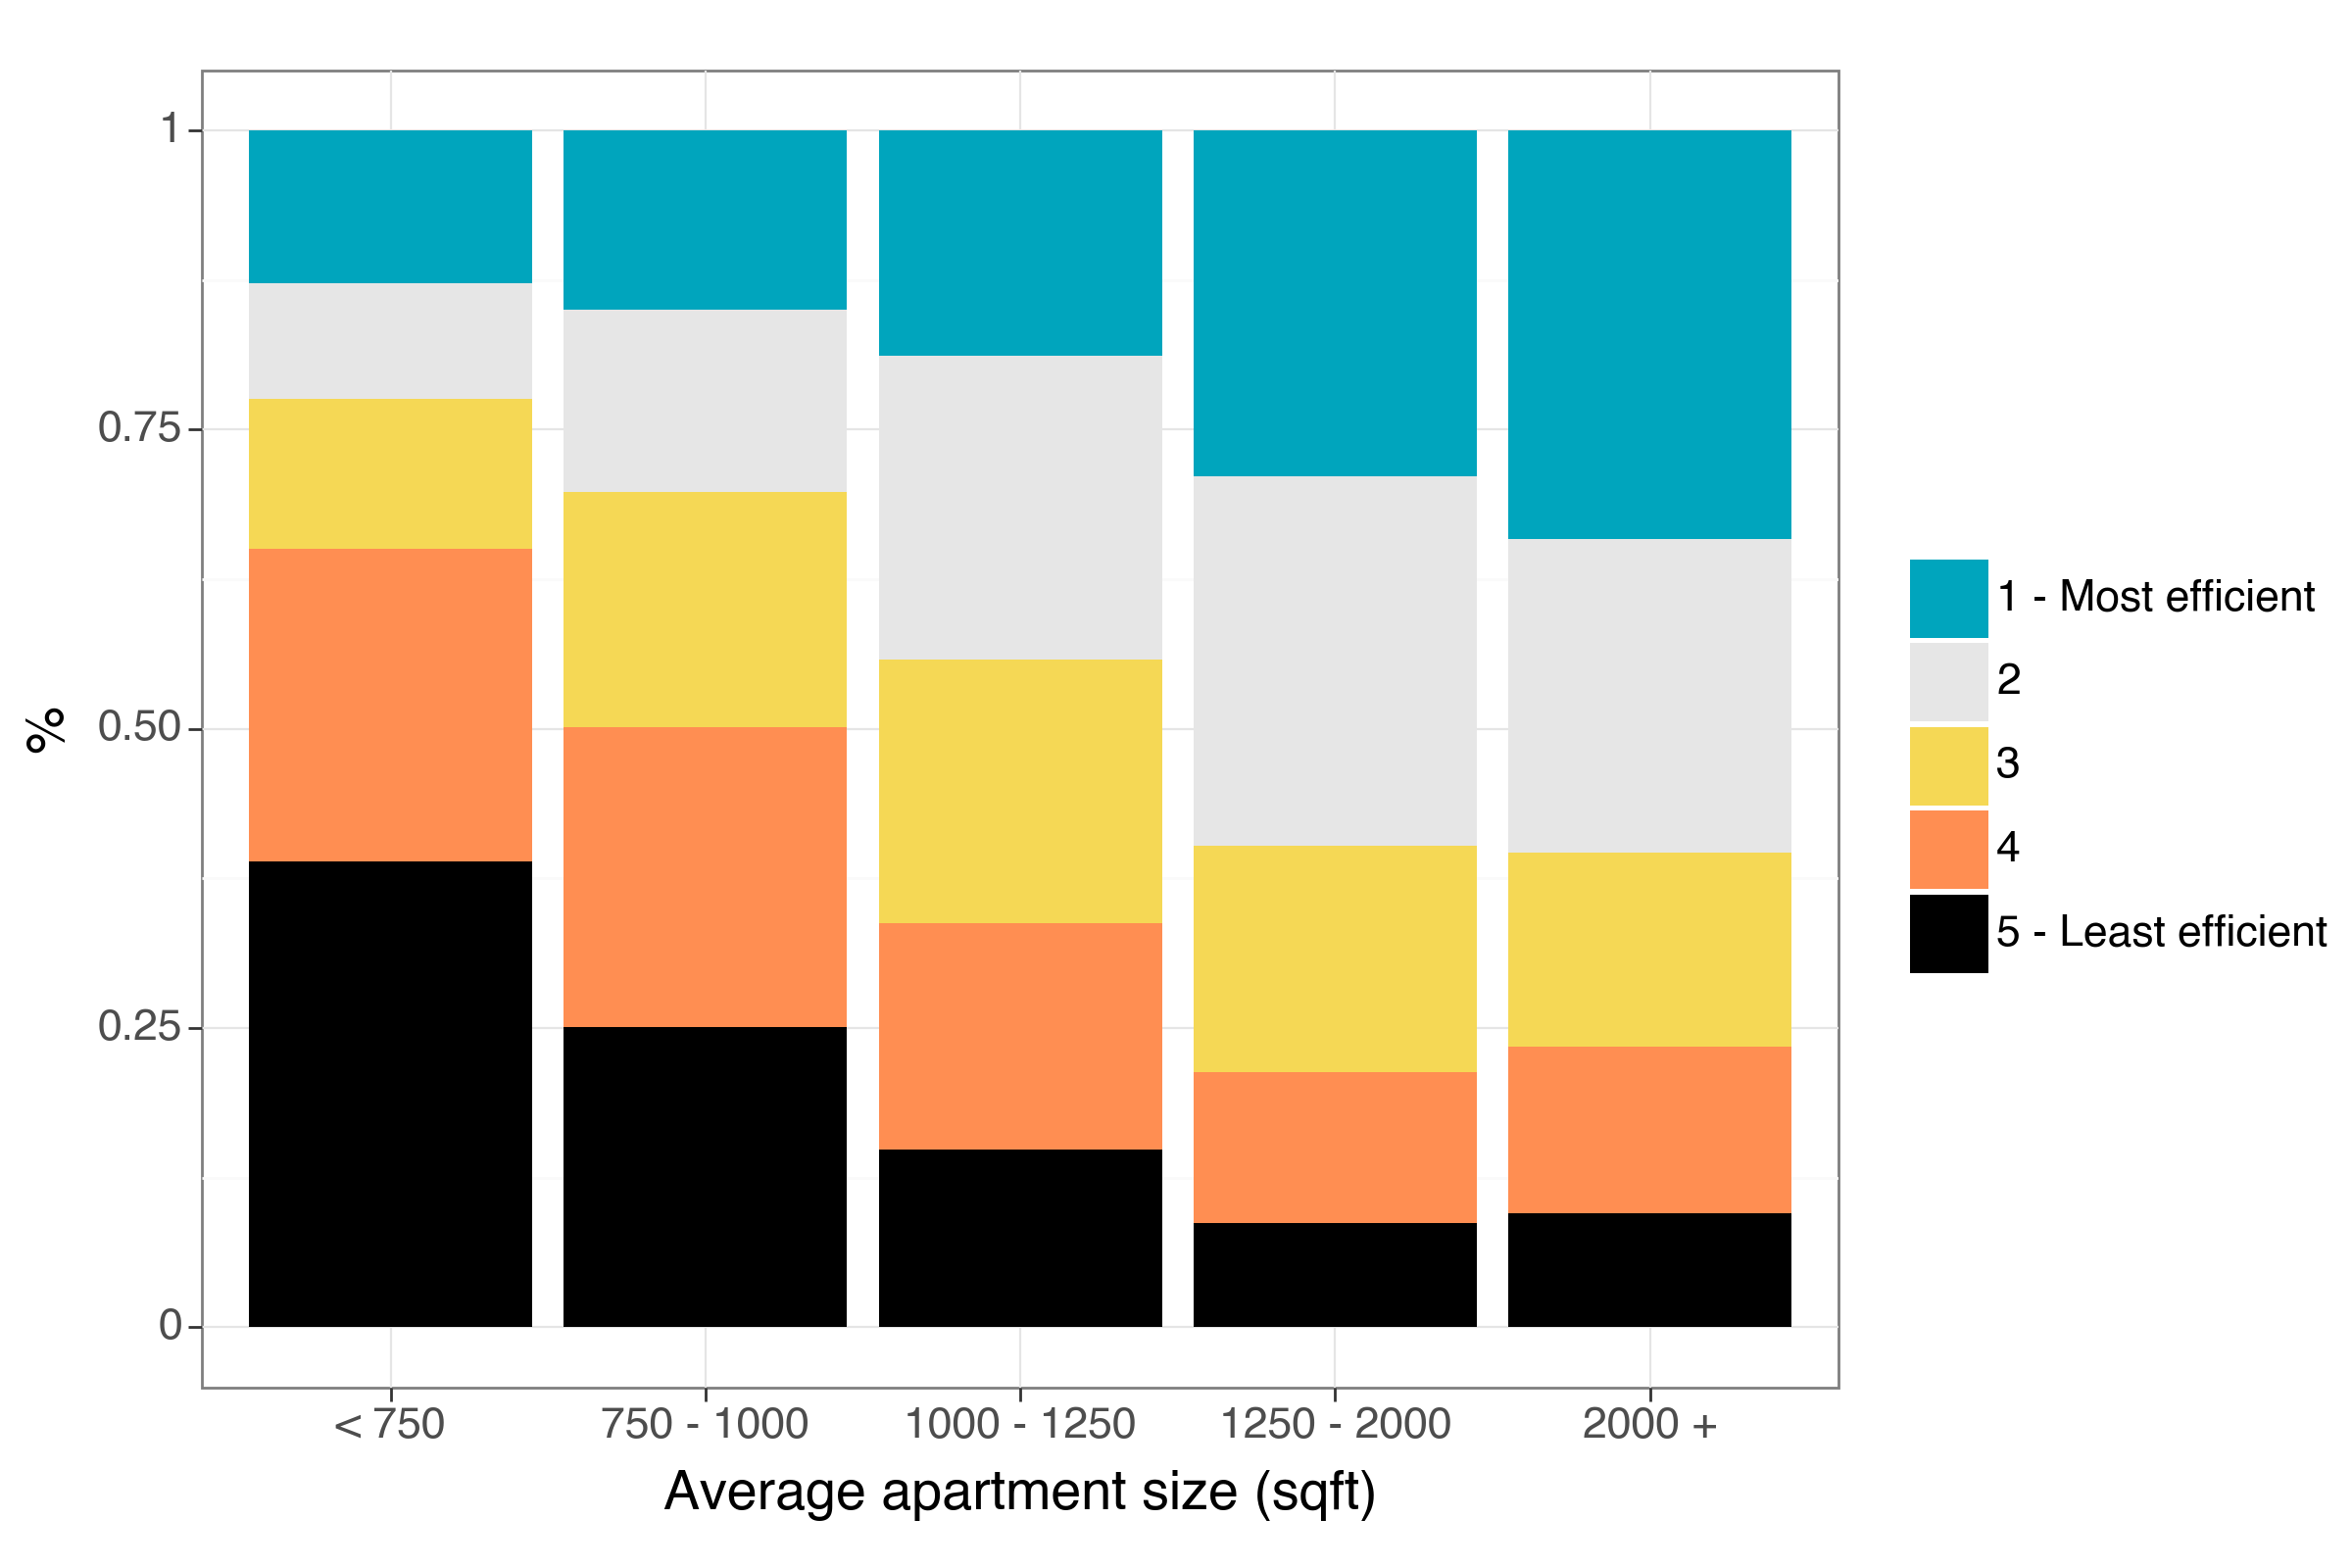

<Figure Size: (1200 x 800)>

In [13]:
(ggplot(ghg, aes(x = "apt_size_cat", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(x = "Average apartment size (sqft)", y = "%") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

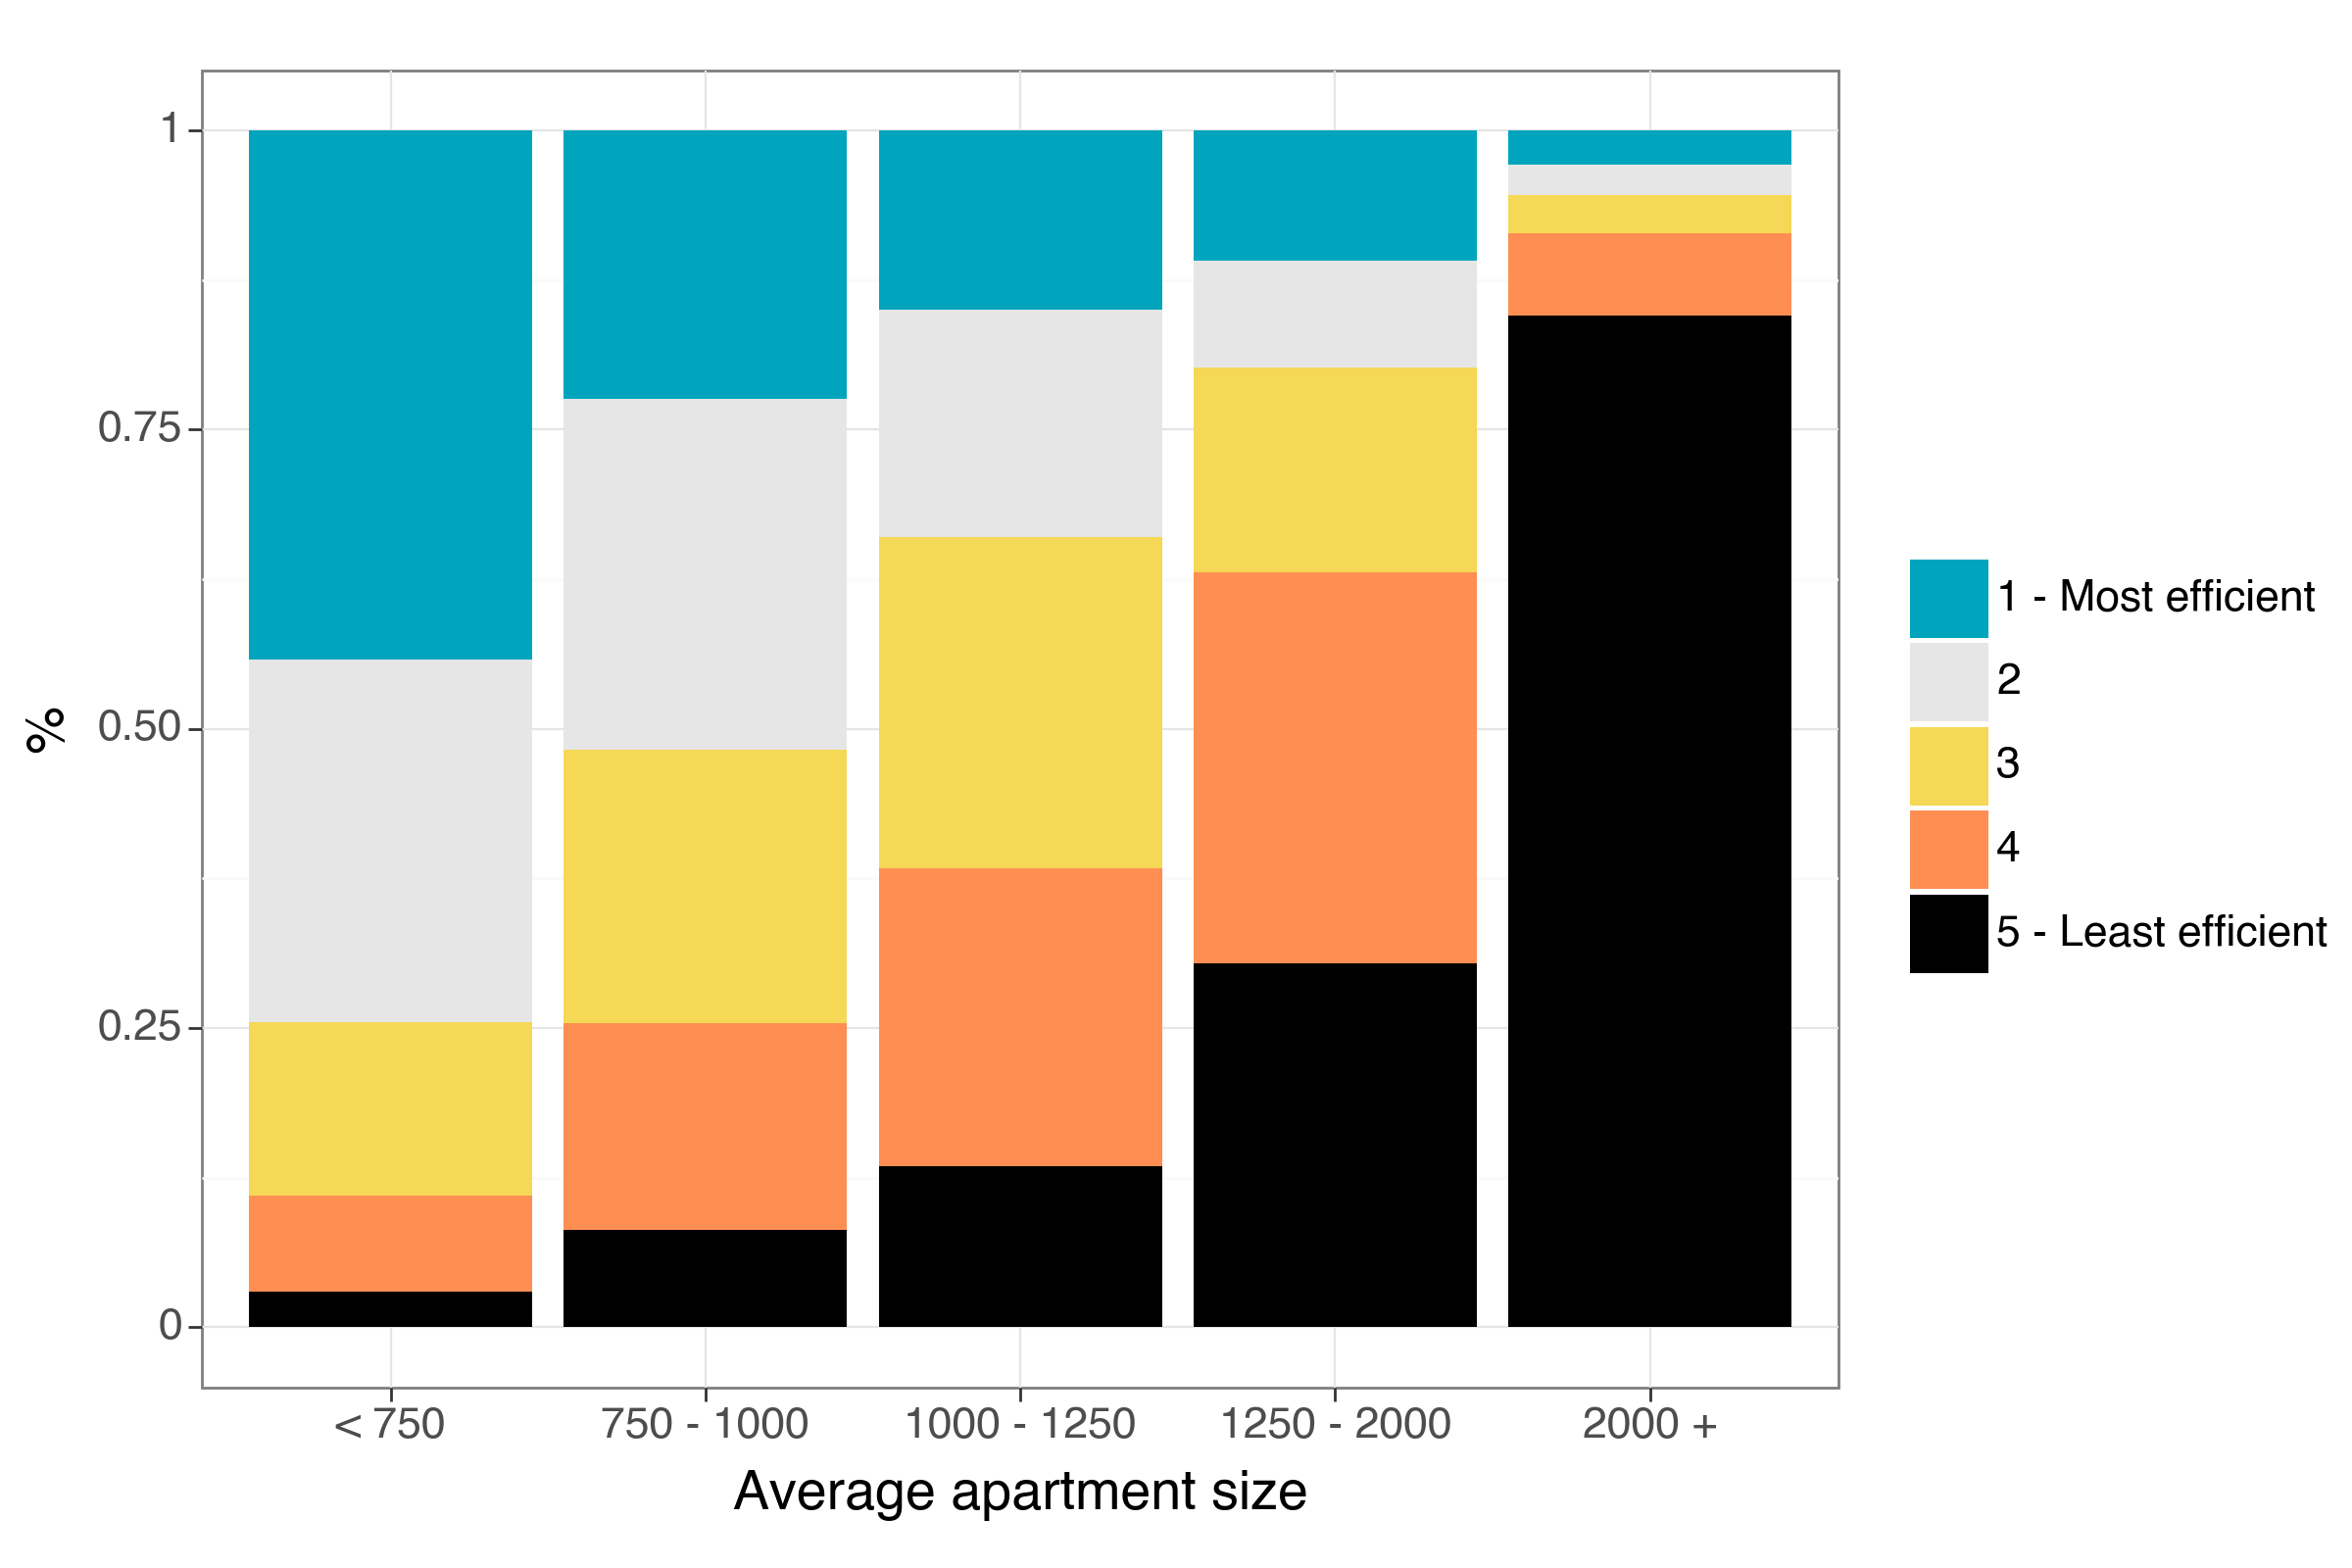

<Figure Size: (1200 x 800)>

In [14]:
(ggplot(ghg, aes(x = "apt_size_cat", fill = "unit_co2_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "%", x = "Average apartment size") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_91040/1800035807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


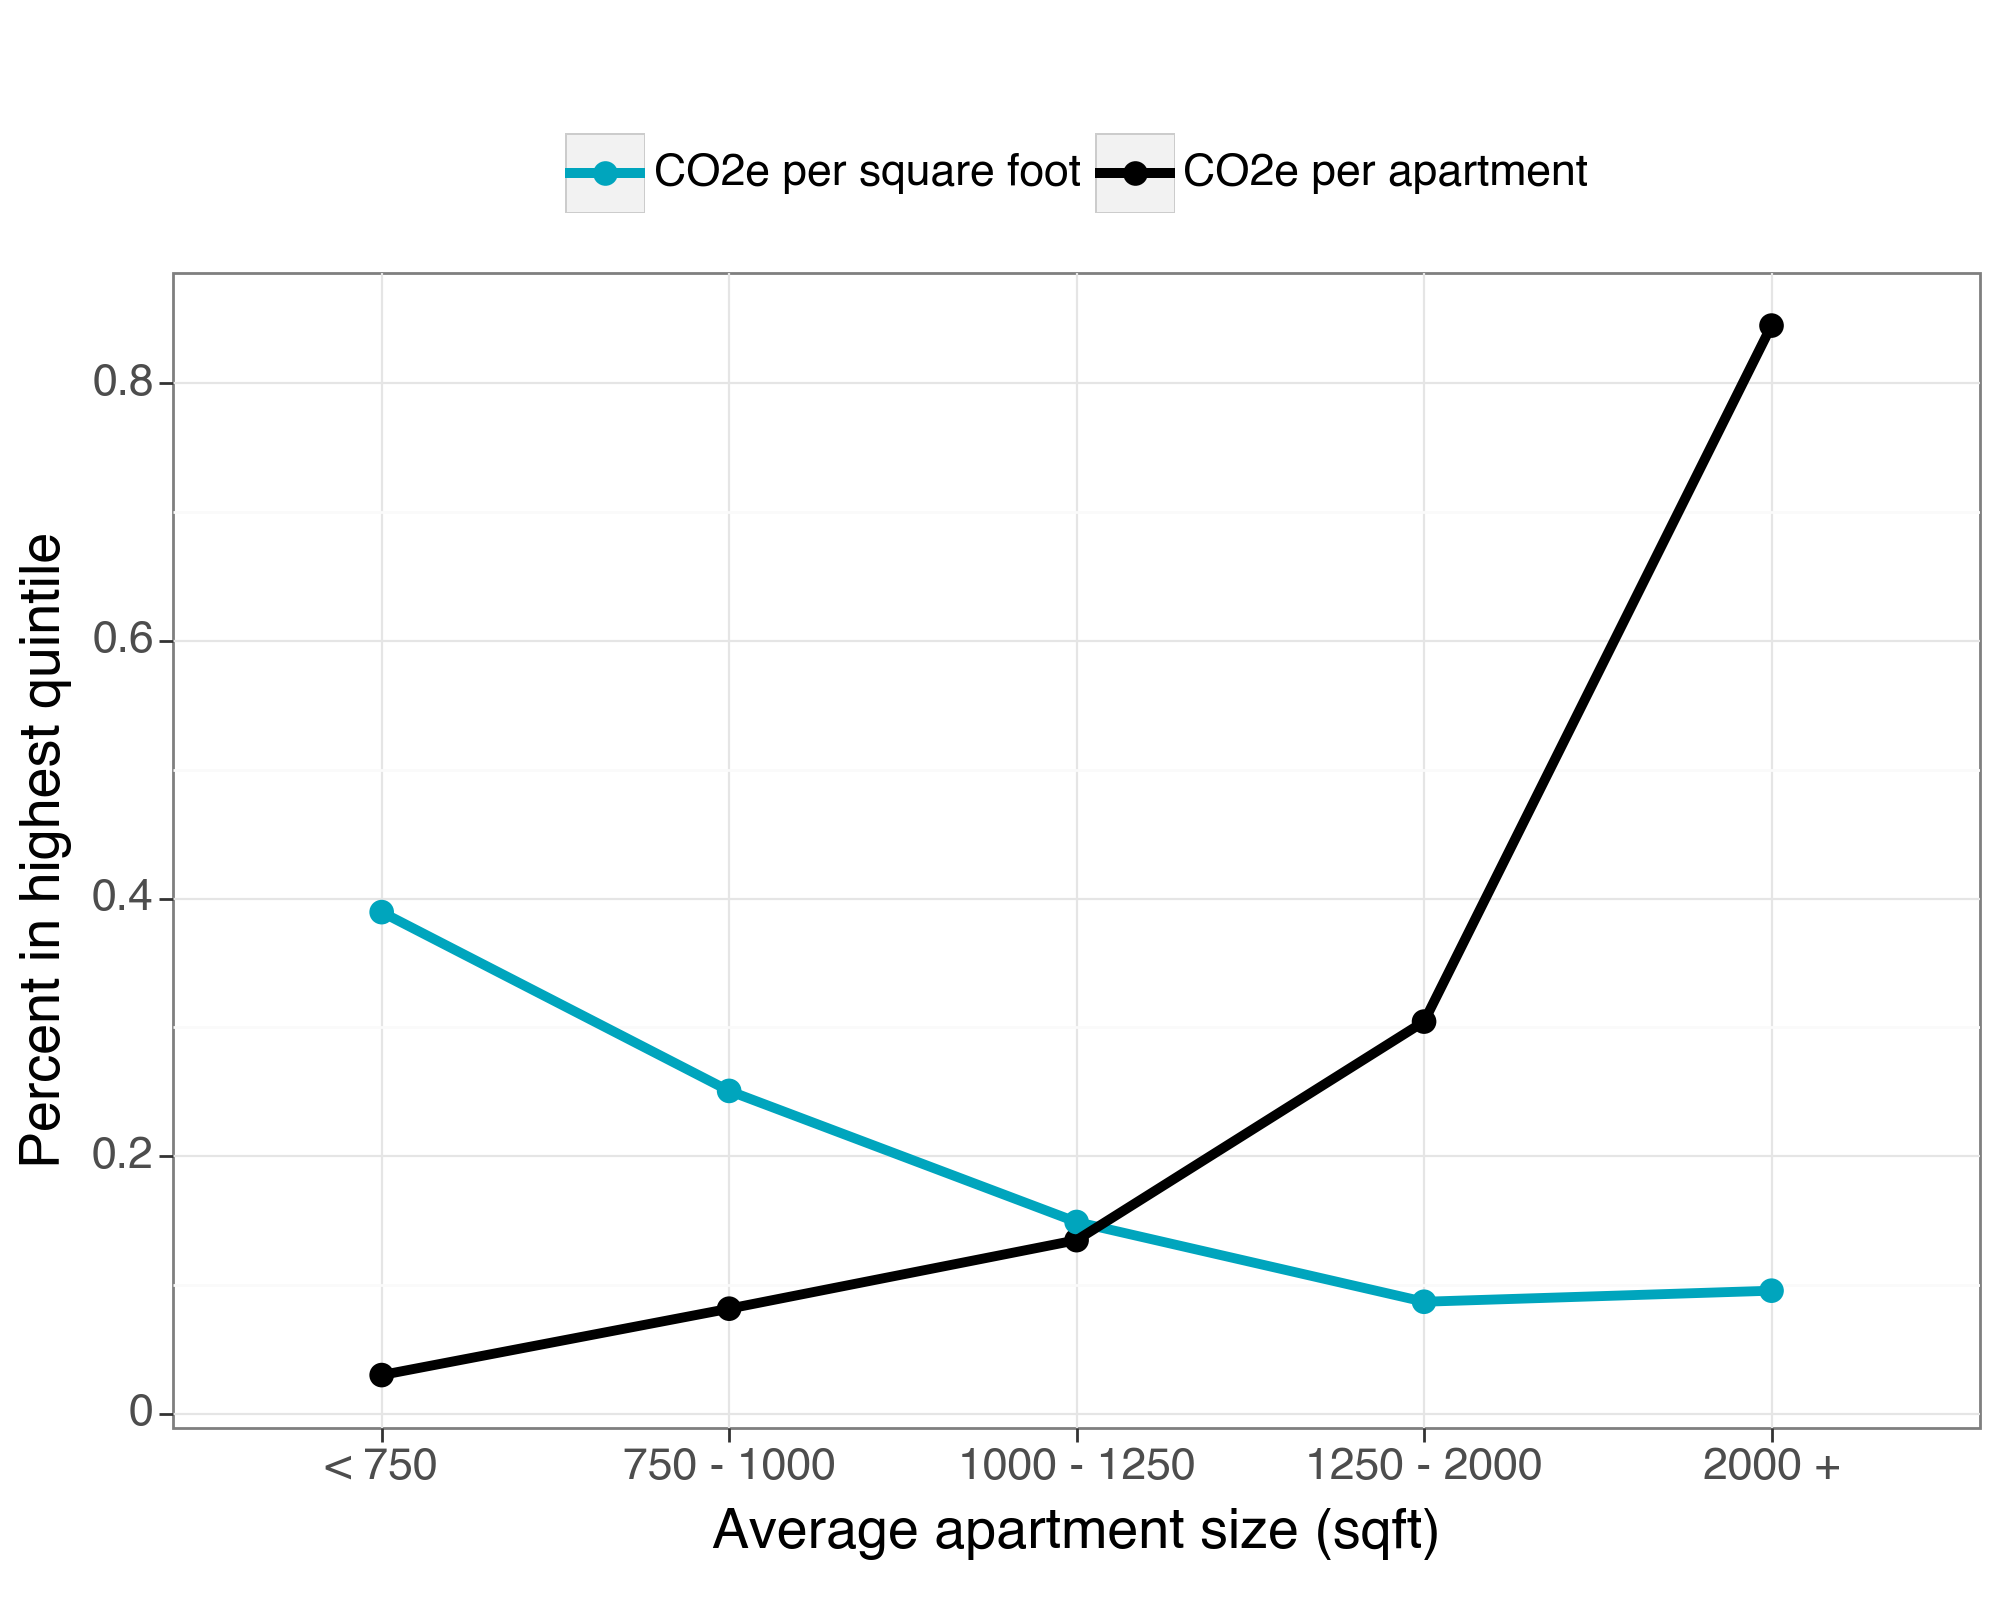

<Figure Size: (1000 x 800)>

In [15]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
(ggplot(plot_dat, aes(x = "apt_size_cat", y = "value", color = "variable", group = "variable")) +
 geom_point(size = 4) +
 geom_line(size = 2) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_91040/1800035807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


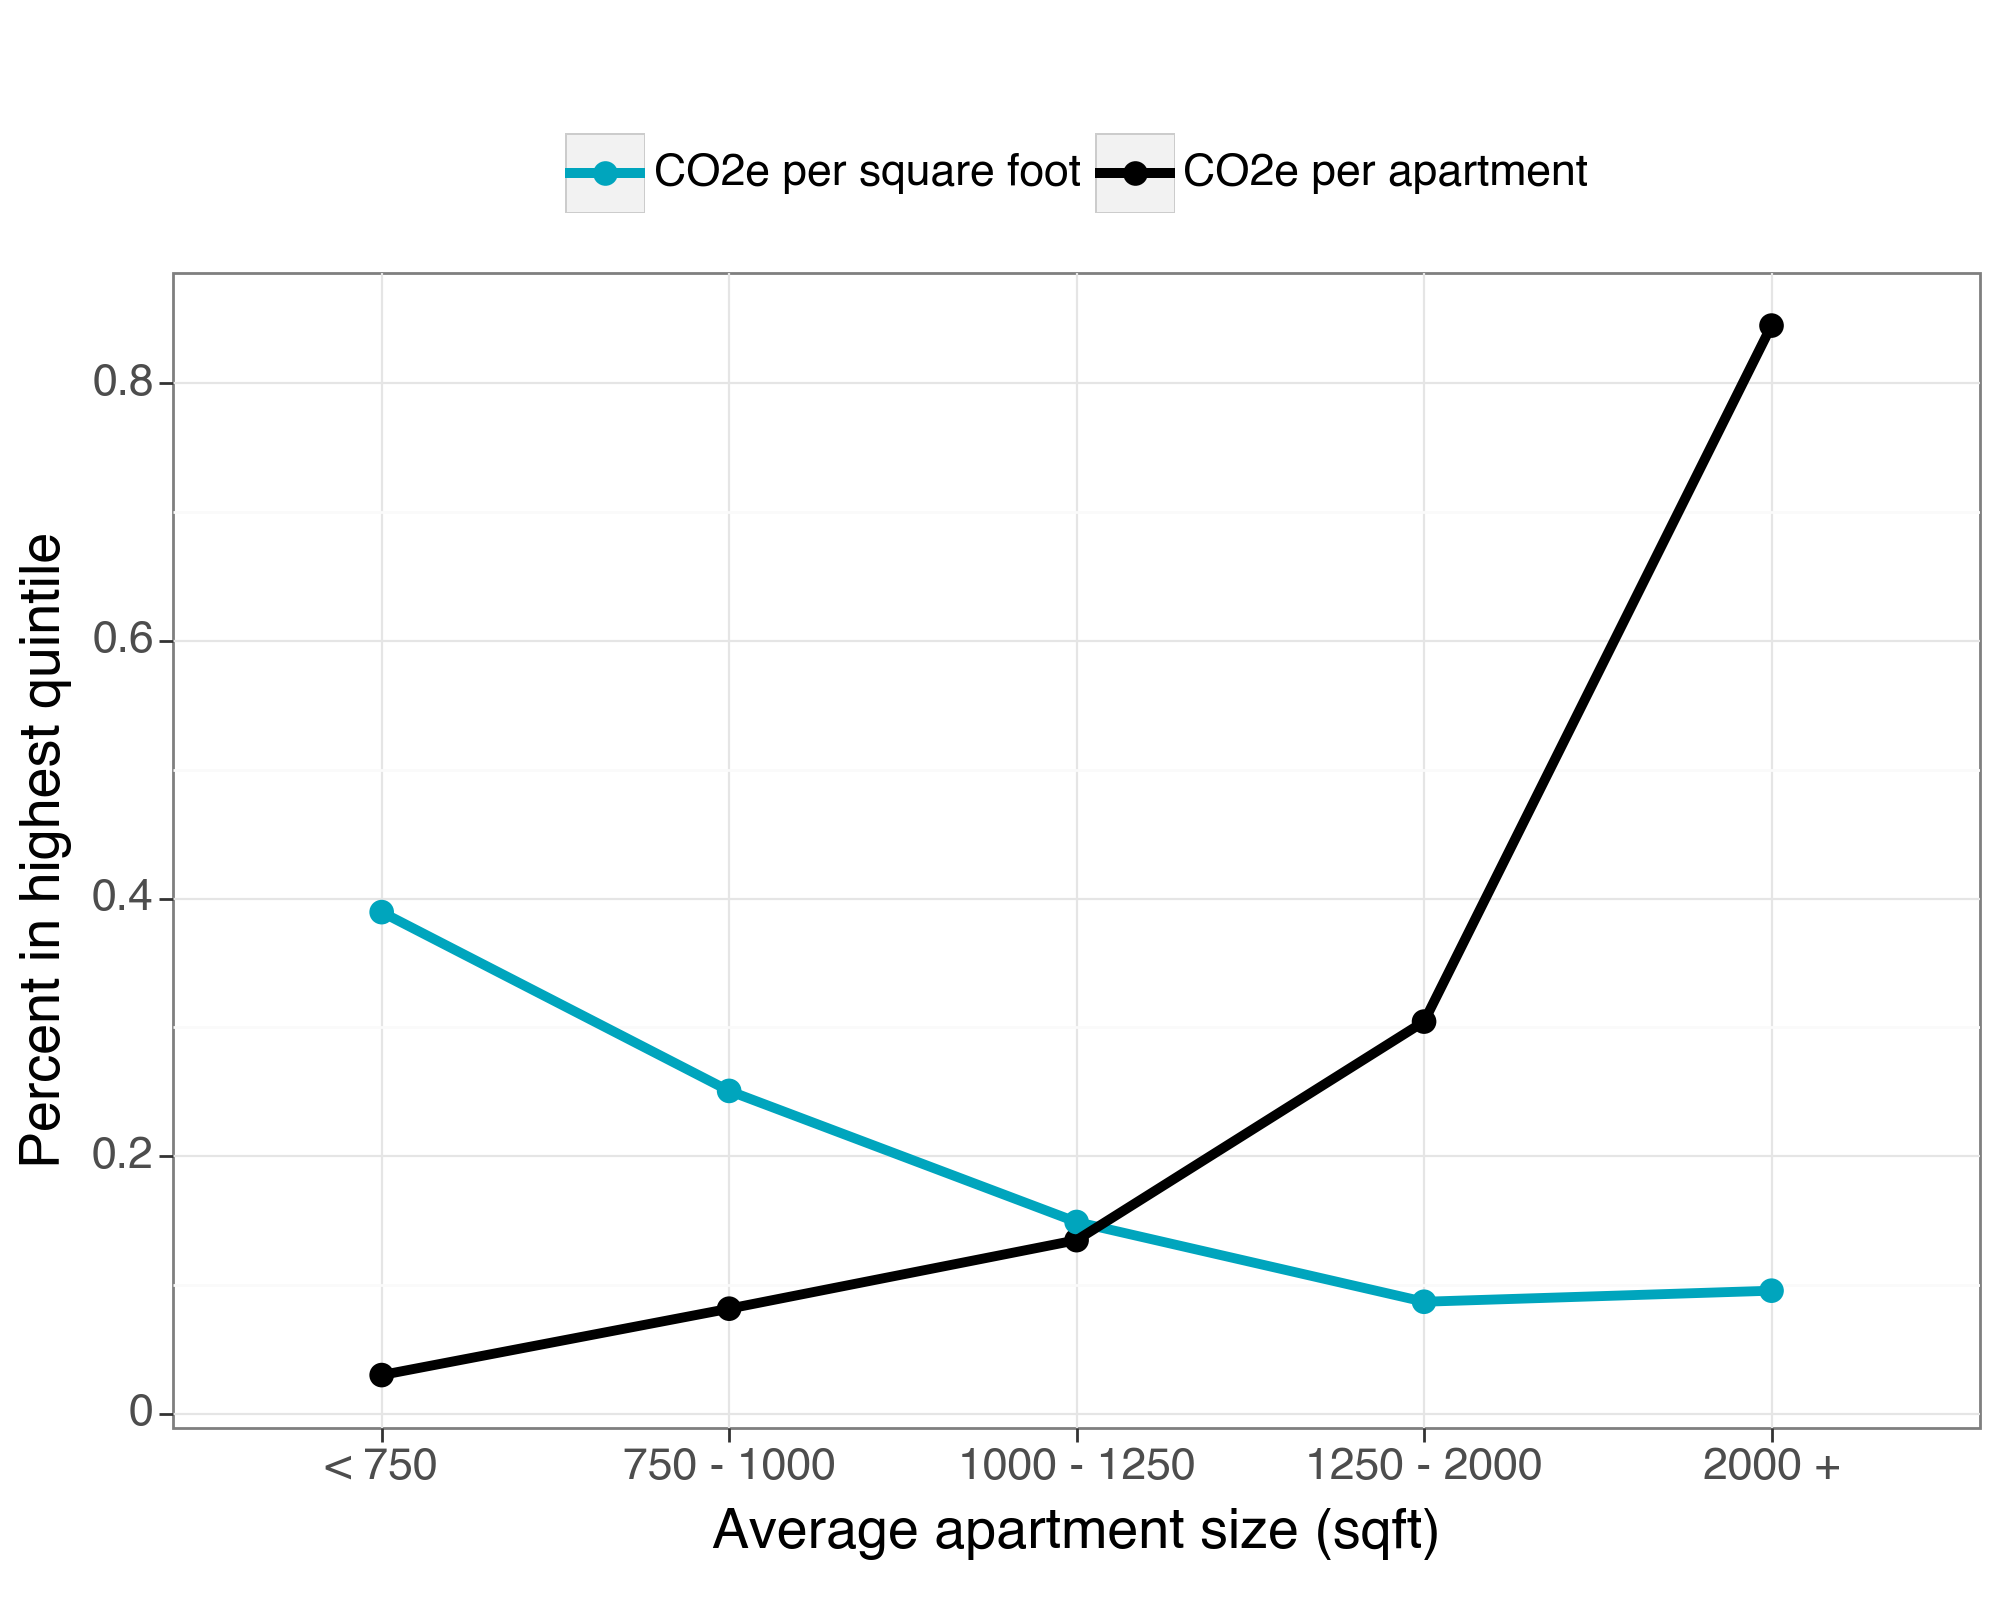

<Figure Size: (1000 x 800)>

In [16]:
plot_dat = ghg.groupby("apt_size_cat").agg({"bottom_quint_unit" : "mean", "bottom_quint" : "mean"}).reset_index().melt(id_vars = "apt_size_cat")
(ggplot(plot_dat, aes(x = "apt_size_cat", y = "value", color = "variable", group = "variable")) +
 geom_point(size = 4) +
 geom_line(size = 2) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#000000"], labels = ["CO2e per square foot", "CO2e per apartment"]) +
 labs(y = "Percent in highest quintile", x = "Average apartment size (sqft)") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 65 rows containing missing values.


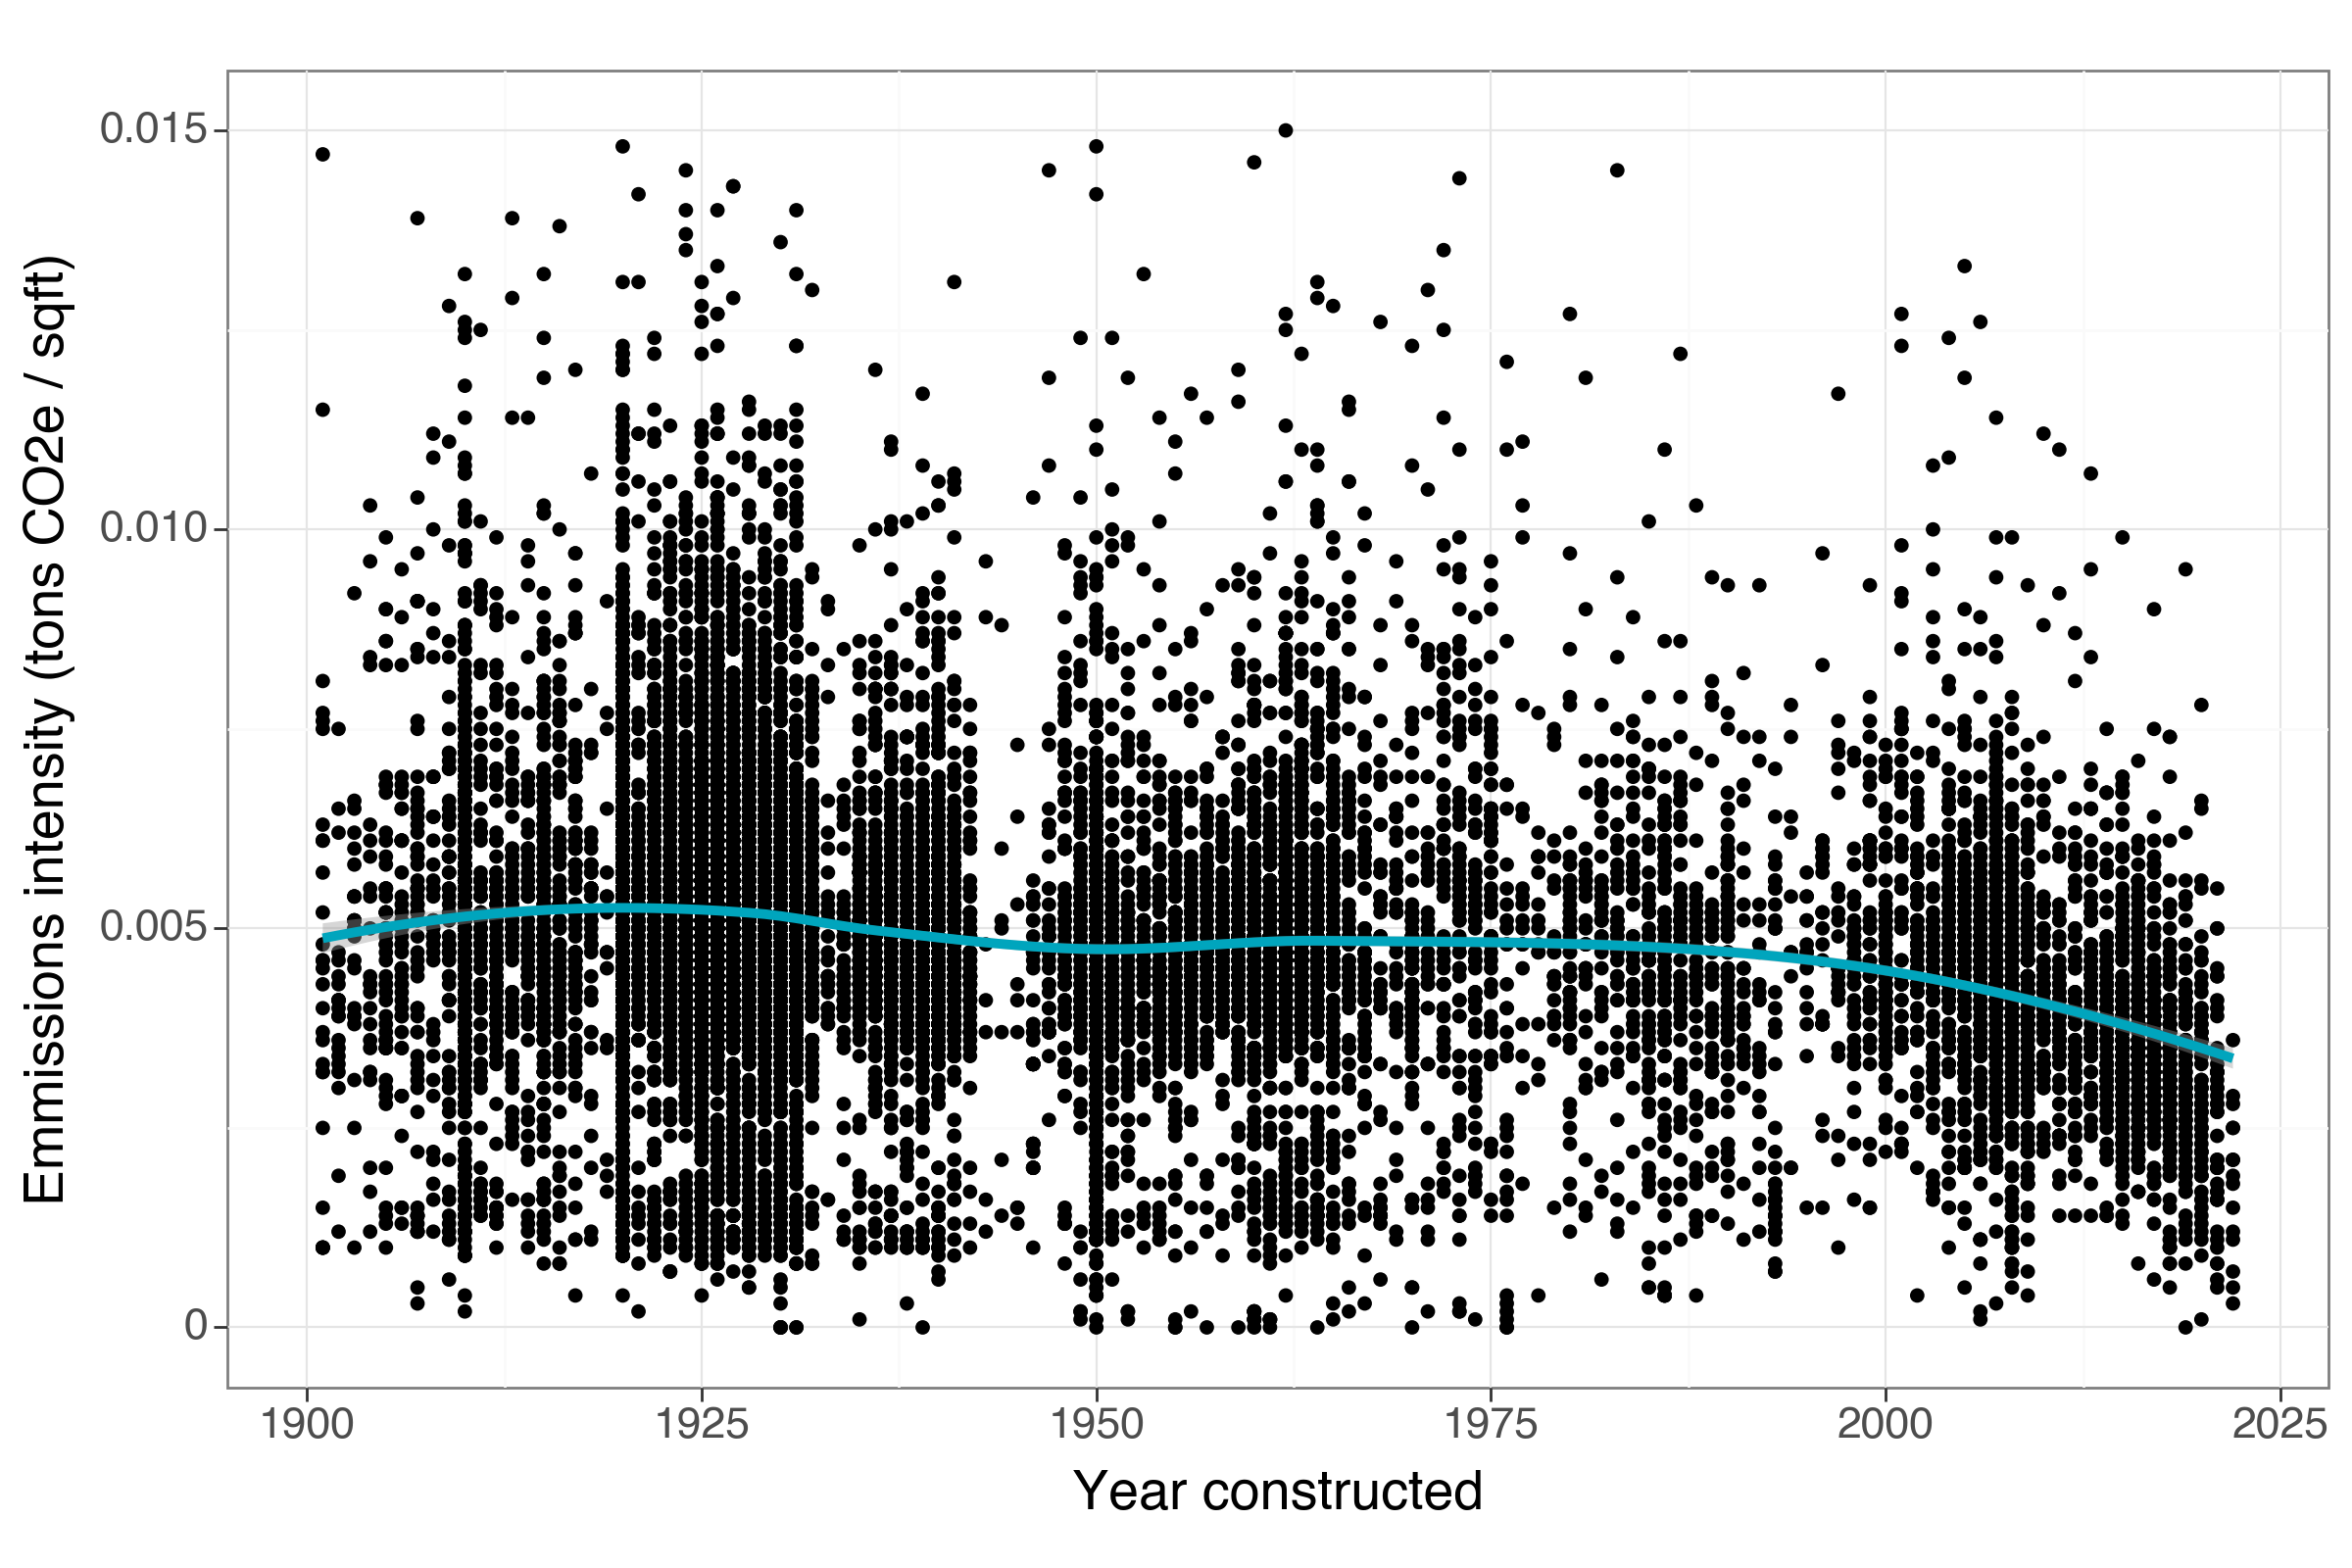

<Figure Size: (1200 x 800)>

In [17]:
(ggplot(ghg.query("year_built > 1900 & year_built < 2024"), aes(x = "year_built", y = "co2_tons_sq")) +
 geom_point(size =2) + 
 geom_smooth(method = "loess", color = colors[0], size = 2) + 
 ylim(0, .015) +
 labs(y = "Emmissions intensity (tons CO2e / sqft)", x = "Year constructed") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

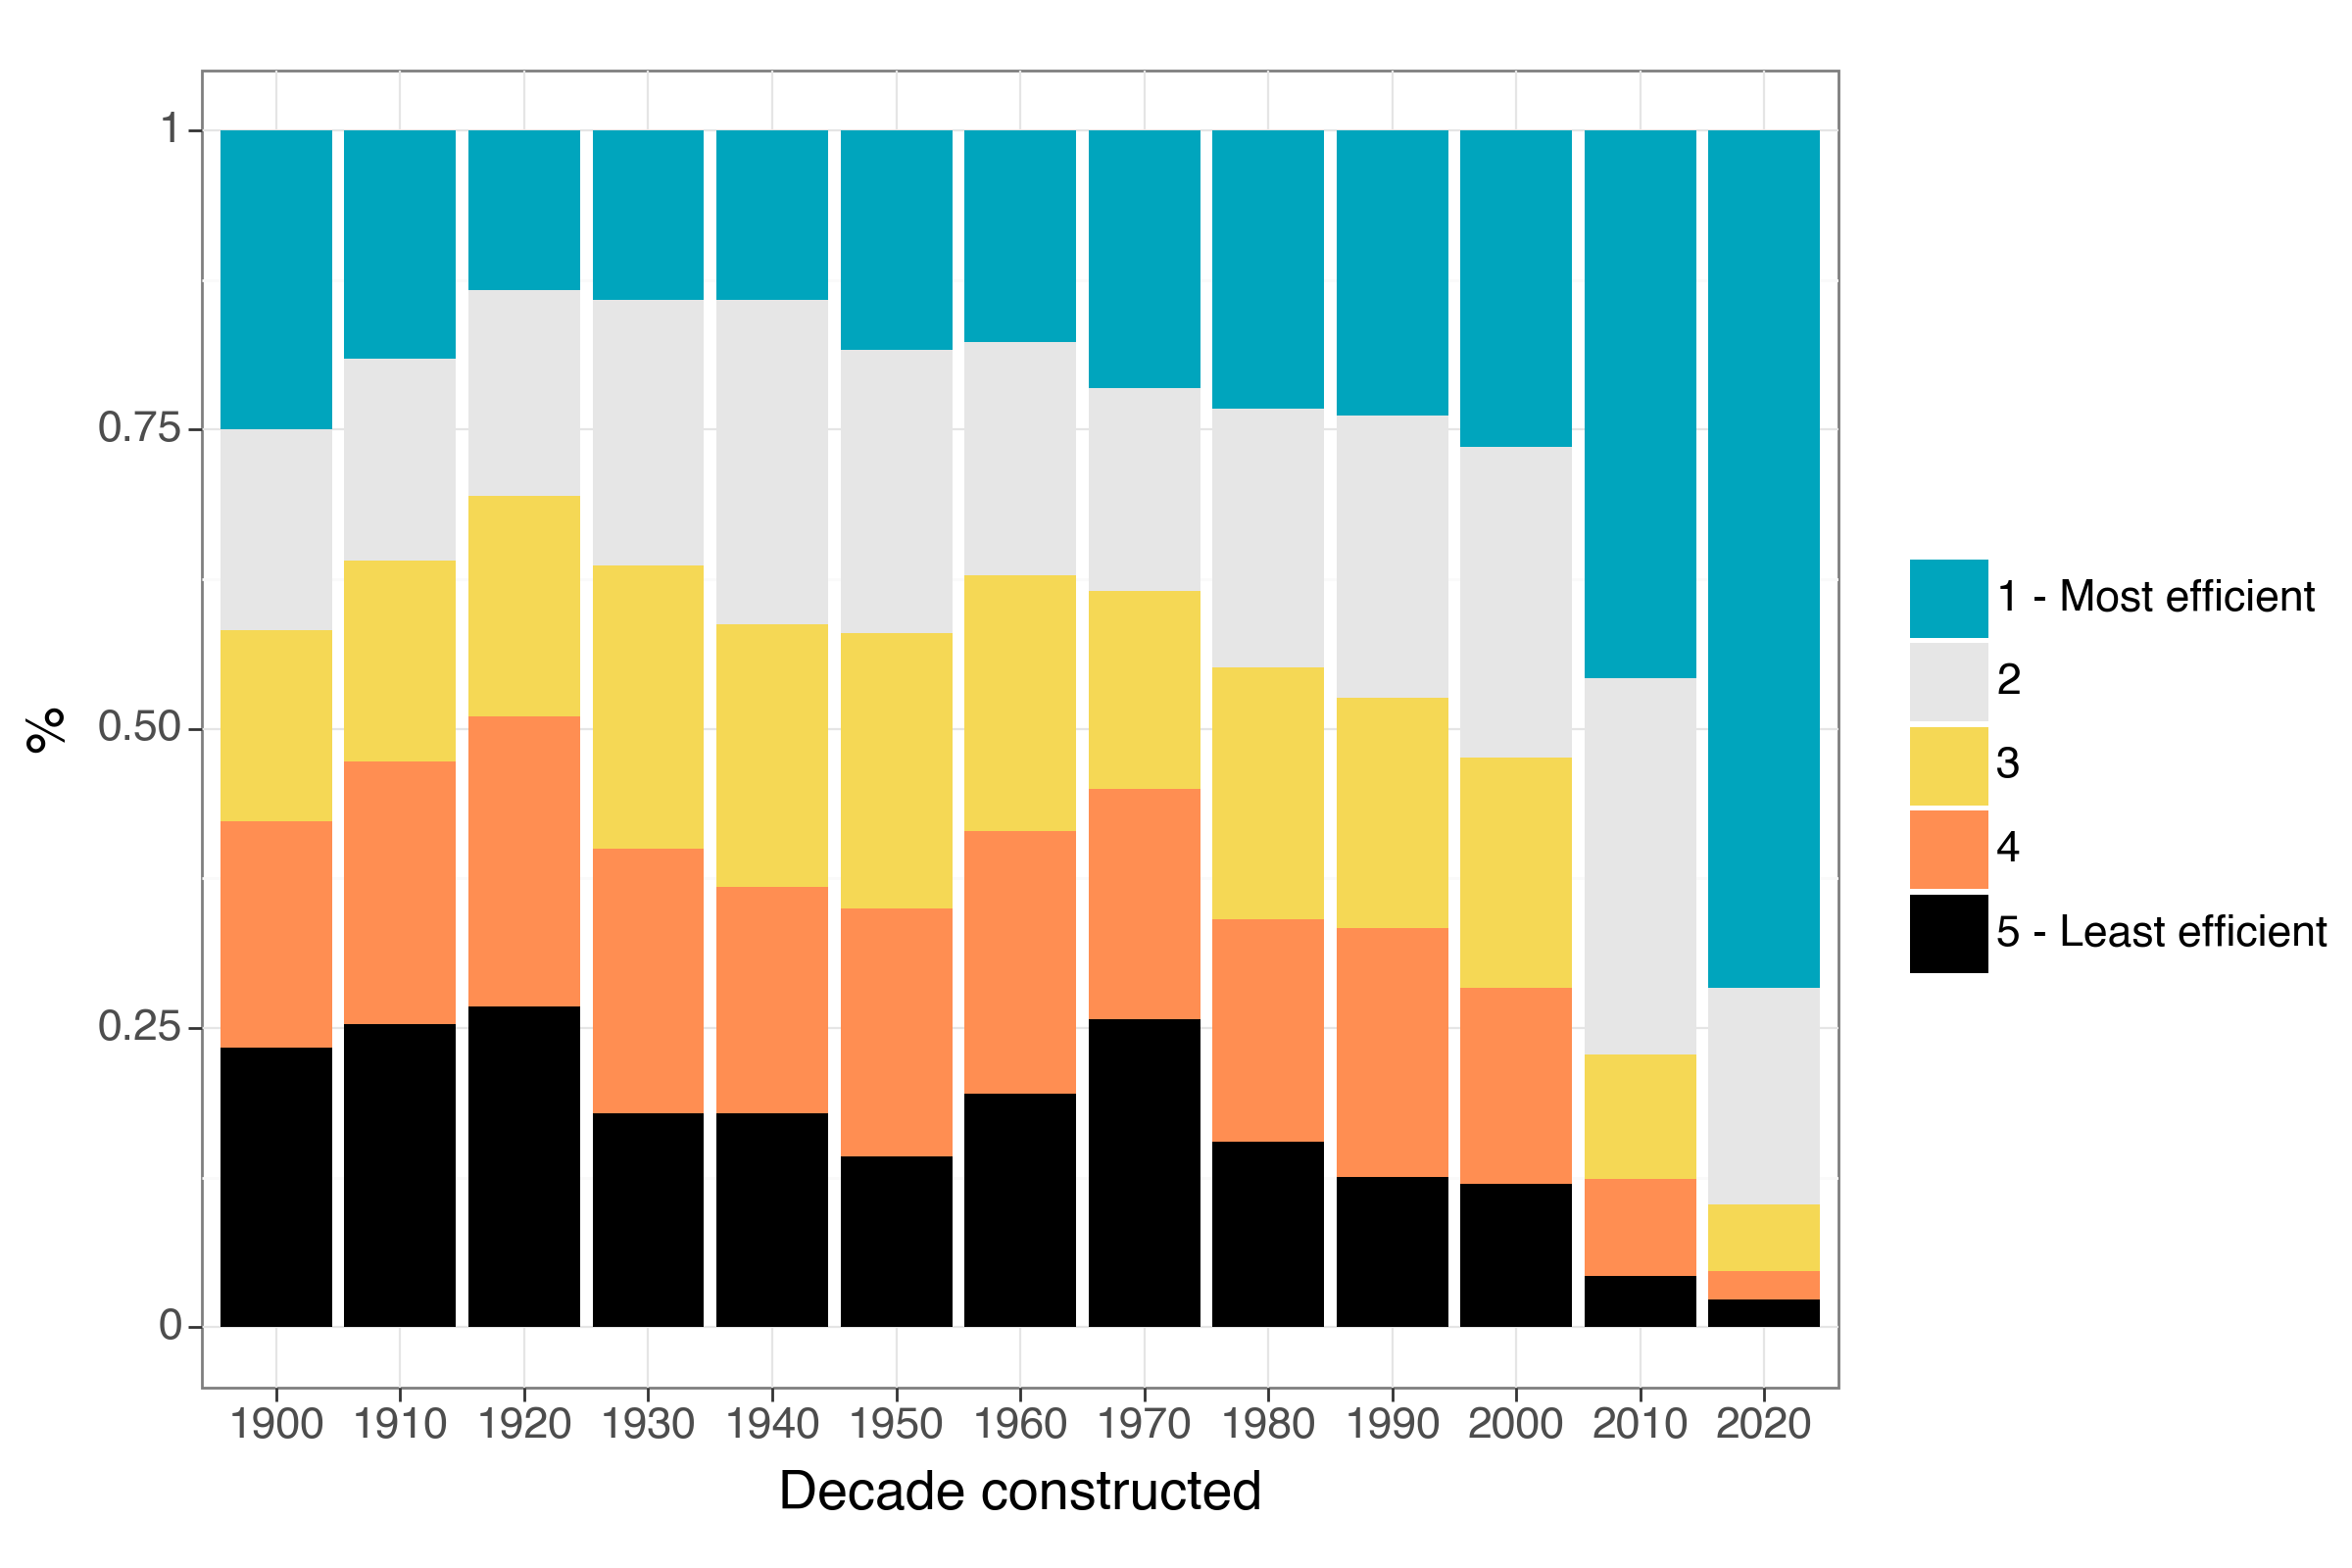

<Figure Size: (1200 x 800)>

In [18]:
ghg["decade_built"] = ghg['decade_built'].astype(str)
(ggplot(ghg.query("year_built > 1900 & year_built < 2024"), aes(x = "decade_built", fill = "efficiency_quintile")) + 
 geom_bar(position = "fill") +
 scale_fill_manual(name = " ", values = colors, labels = ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) +
 labs(y = "%", x = "Decade constructed") +
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

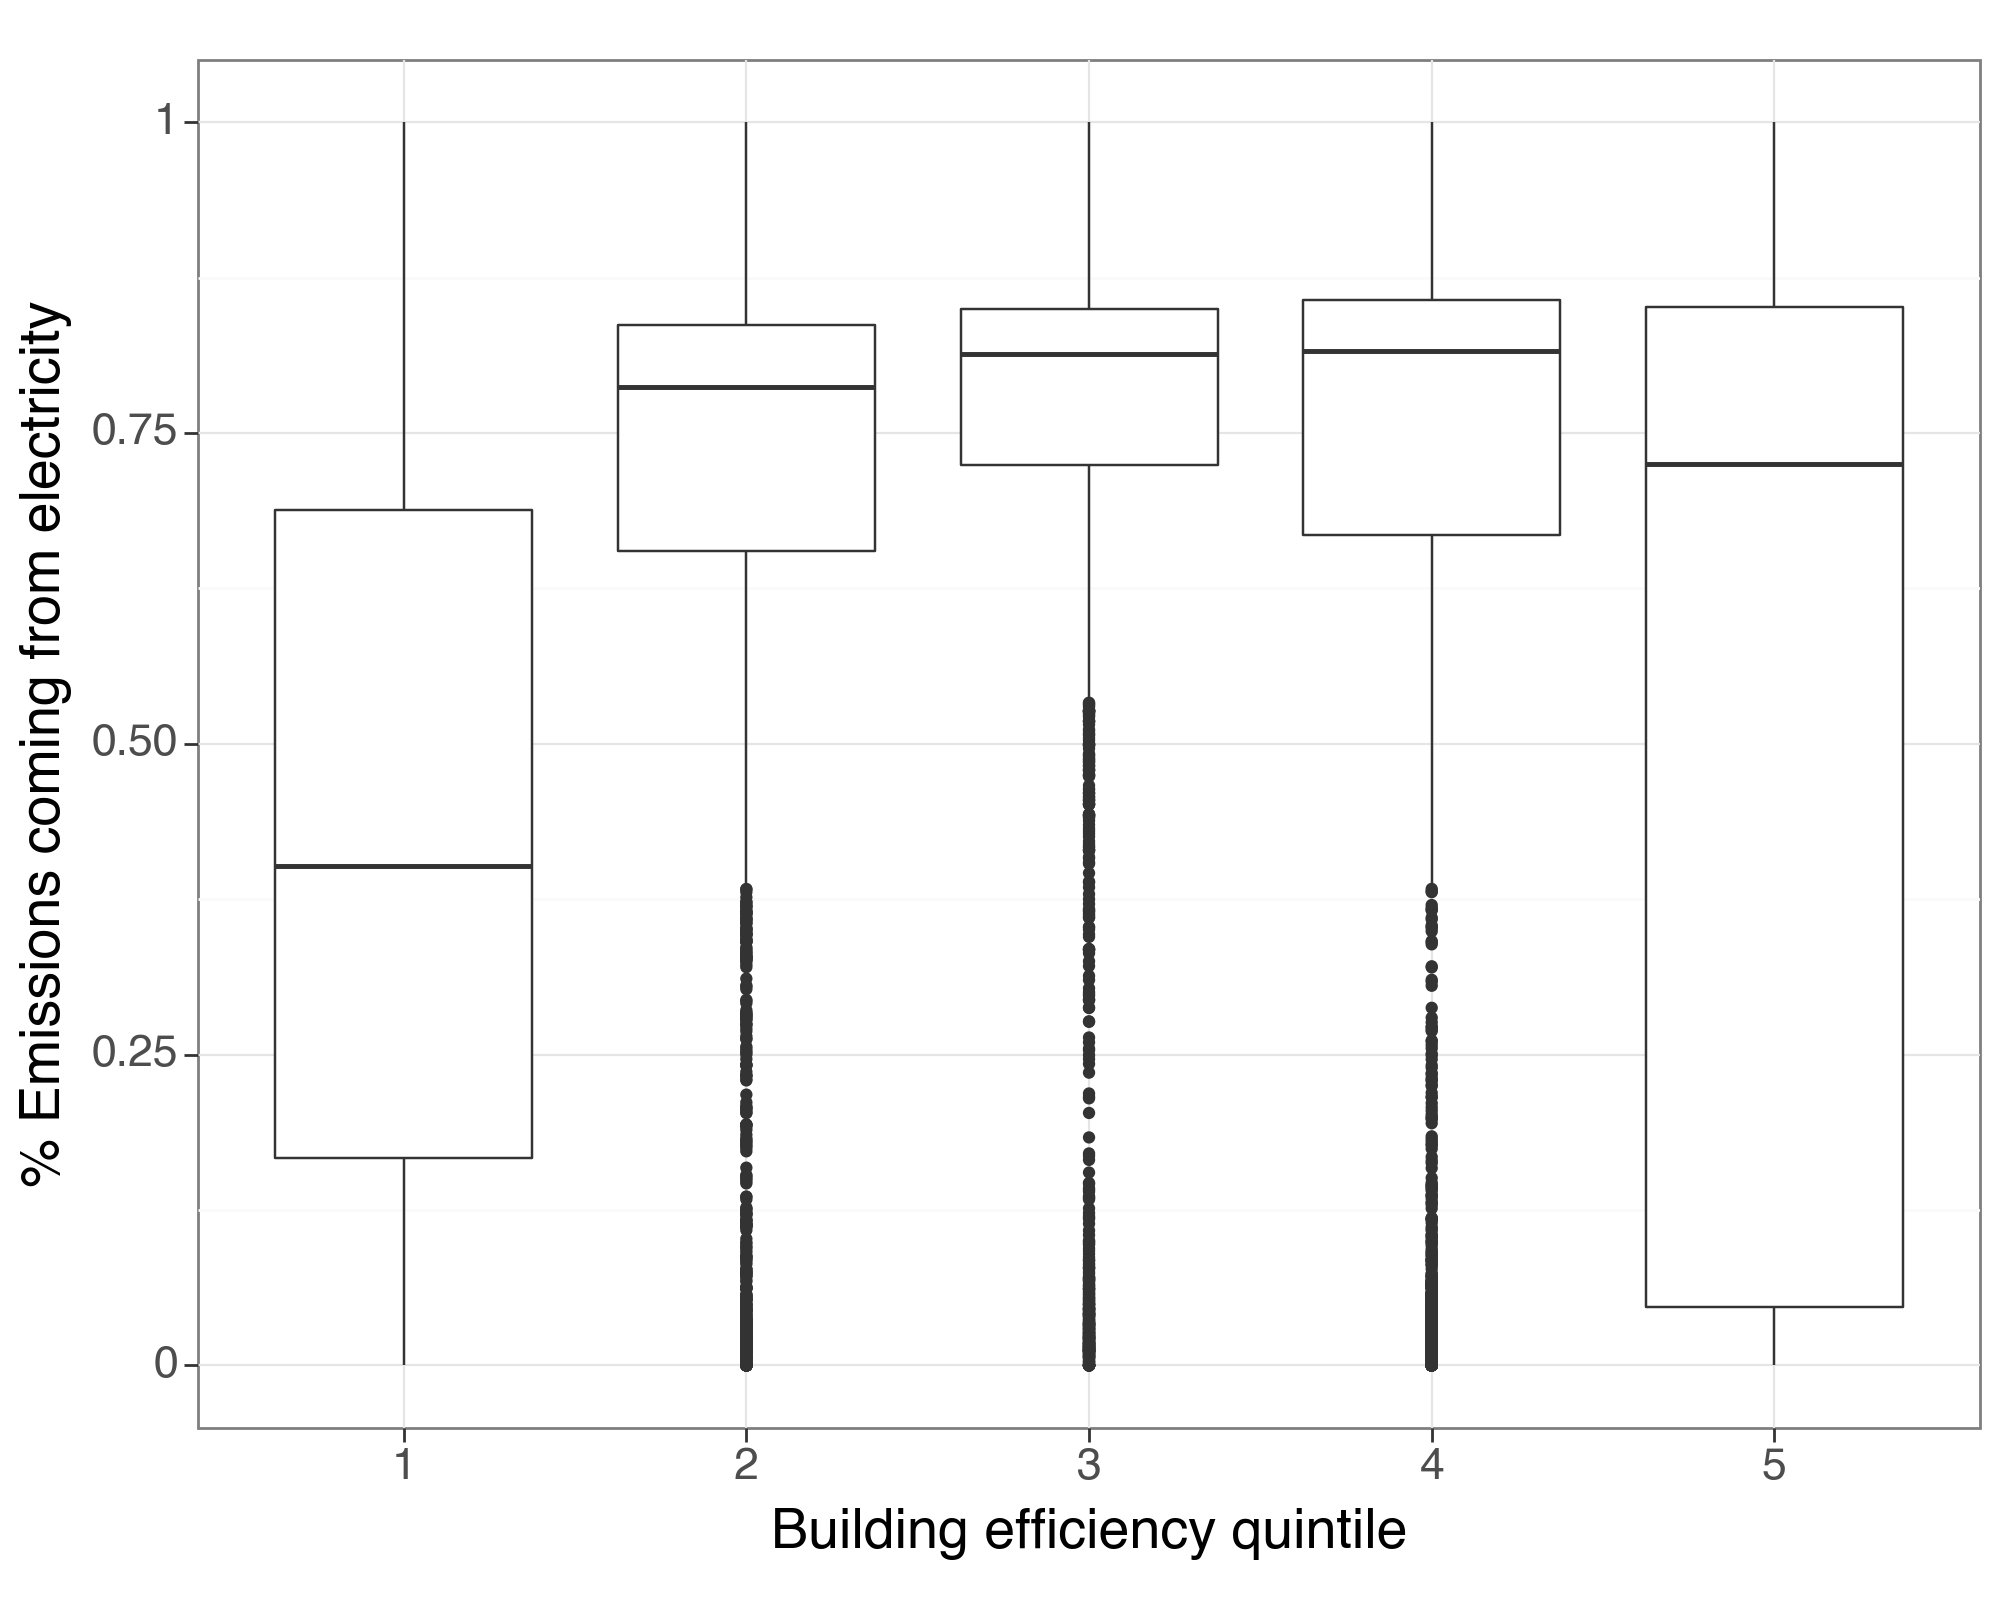

<Figure Size: (1000 x 800)>

In [19]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "natural_gas_energy_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [20]:
plot_dat

,apt_size_cat,variable,value
0,< 750,bottom_quint_unit,0.029851
1,750 - 1000,bottom_quint_unit,0.081422
2,1000 - 1250,bottom_quint_unit,0.134652
3,1250 - 2000,bottom_quint_unit,0.304398
4,2000 +,bottom_quint_unit,0.844974
5,< 750,bottom_quint,0.389417
6,750 - 1000,bottom_quint,0.250565
7,1000 - 1250,bottom_quint,0.148748
8,1250 - 2000,bottom_quint,0.086806
9,2000 +,bottom_quint,0.095400


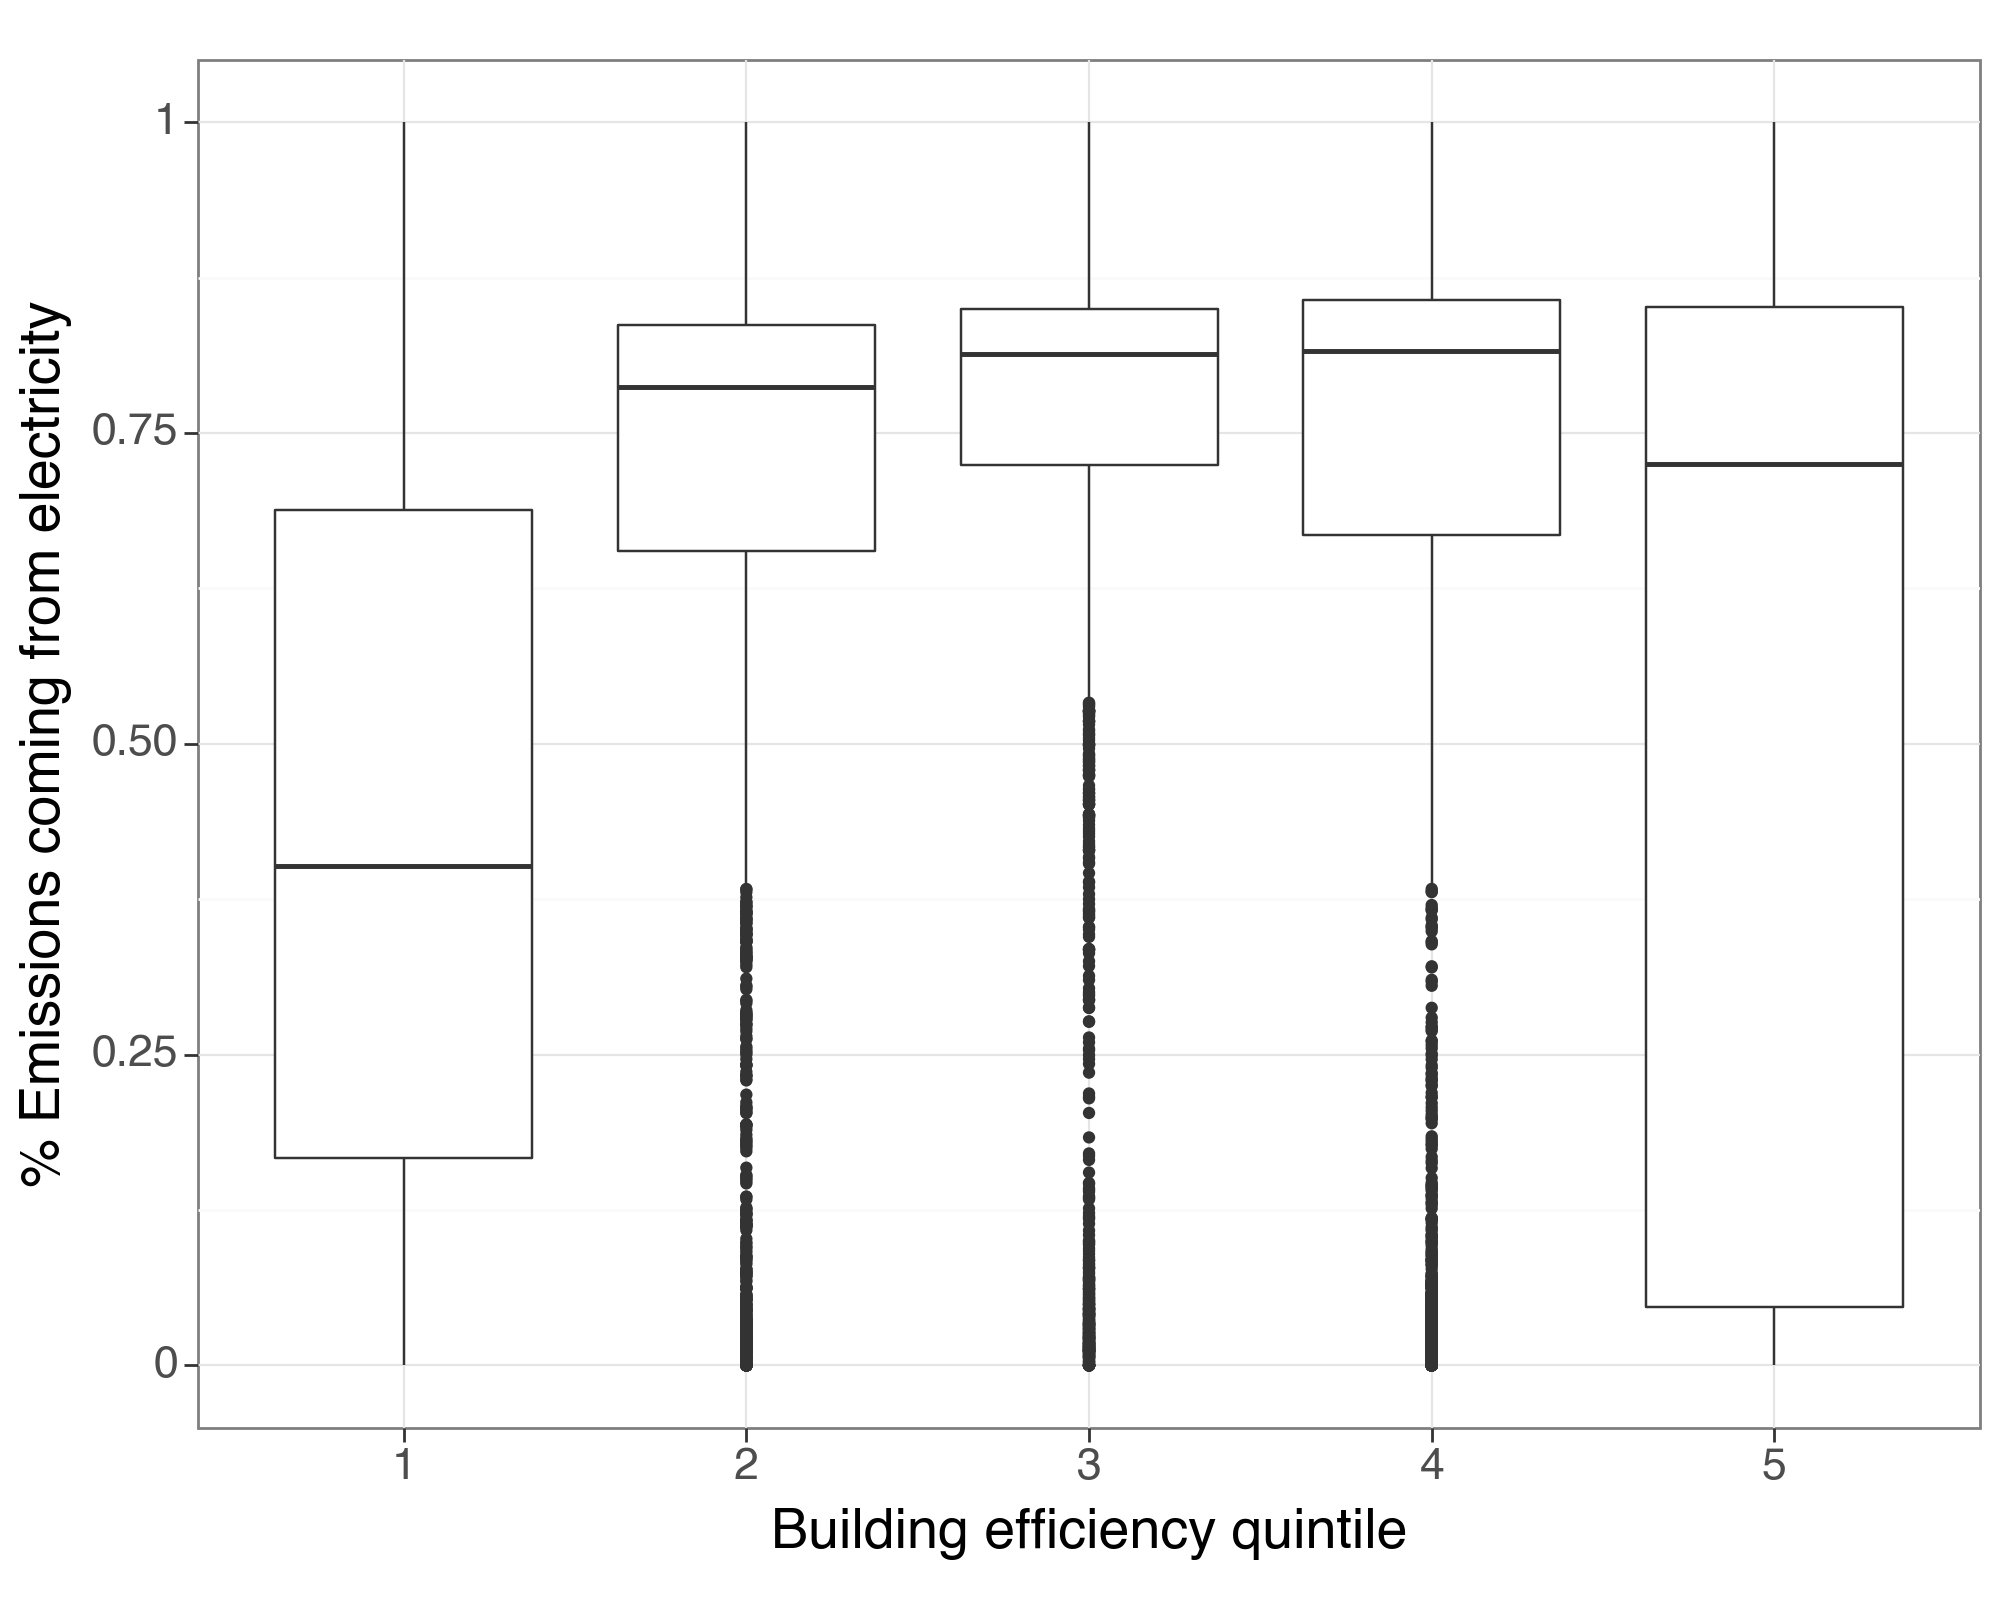

<Figure Size: (1000 x 800)>

In [21]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "natural_gas_energy_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [22]:
ghg.columns

Index(['bbl', 'name', 'property id', 'total_units', 'eui', 'bedrooms',
       'housing_fa', 'total_fa', 'co2_intensity', 'total_co2', 'latitude',
       'longitude', 'year_built', 'occupancy', 'direct_emissions',
       'indirect_emissions', 'total_e', 'avg_apt_size', 'e_per_apt',
       'co2_tons_sq', 'co2_per_apt', 'co2_per_bedroom', 'exceeds_2024_limit',
       'exceeds_2030_limit', 'decade_built', 'bedrooms_per_apt',
       'sqft_per_bedroom', 'direct_emission_pct', 'efficiency_quintile',
       'unit_co2_quintile', 'bedroom_co2_quintile', 'limit_category',
       'apt_size_cat', 'sqft_bedroom_cat', 'state', 'county', 'tract',
       'total_population', 'pop_in_poverty', 'pop_black', 'pop_hispanic',
       'med_hh_inc', 'geoid', 'income_bin', 'income_q', 'total_energy',
       'total_emissions', 'district_steam_emissions_pct',
       'natural_gas_emissions_pct', 'electricity_emissions_pct',
       'fuel_oil_emissions_pct', 'fuel_oil_energy_pct',
       'district_steam_energy_pct', 

In [23]:
ghg.query("efficiency_quintile == '5' & district_steam_pct > .5").head(10)

UndefinedVariableError: name 'district_steam_pct' is not defined

In [ ]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "electricity_pct")) +
 geom_boxplot() +
 labs(y = "% Emissions coming from electricity", x = "Building efficiency quintile") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

/var/folders/ct/9lwc0fbn26v_v6pz1pfj1dxc0000gq/T/ipykernel_24188/1825568153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


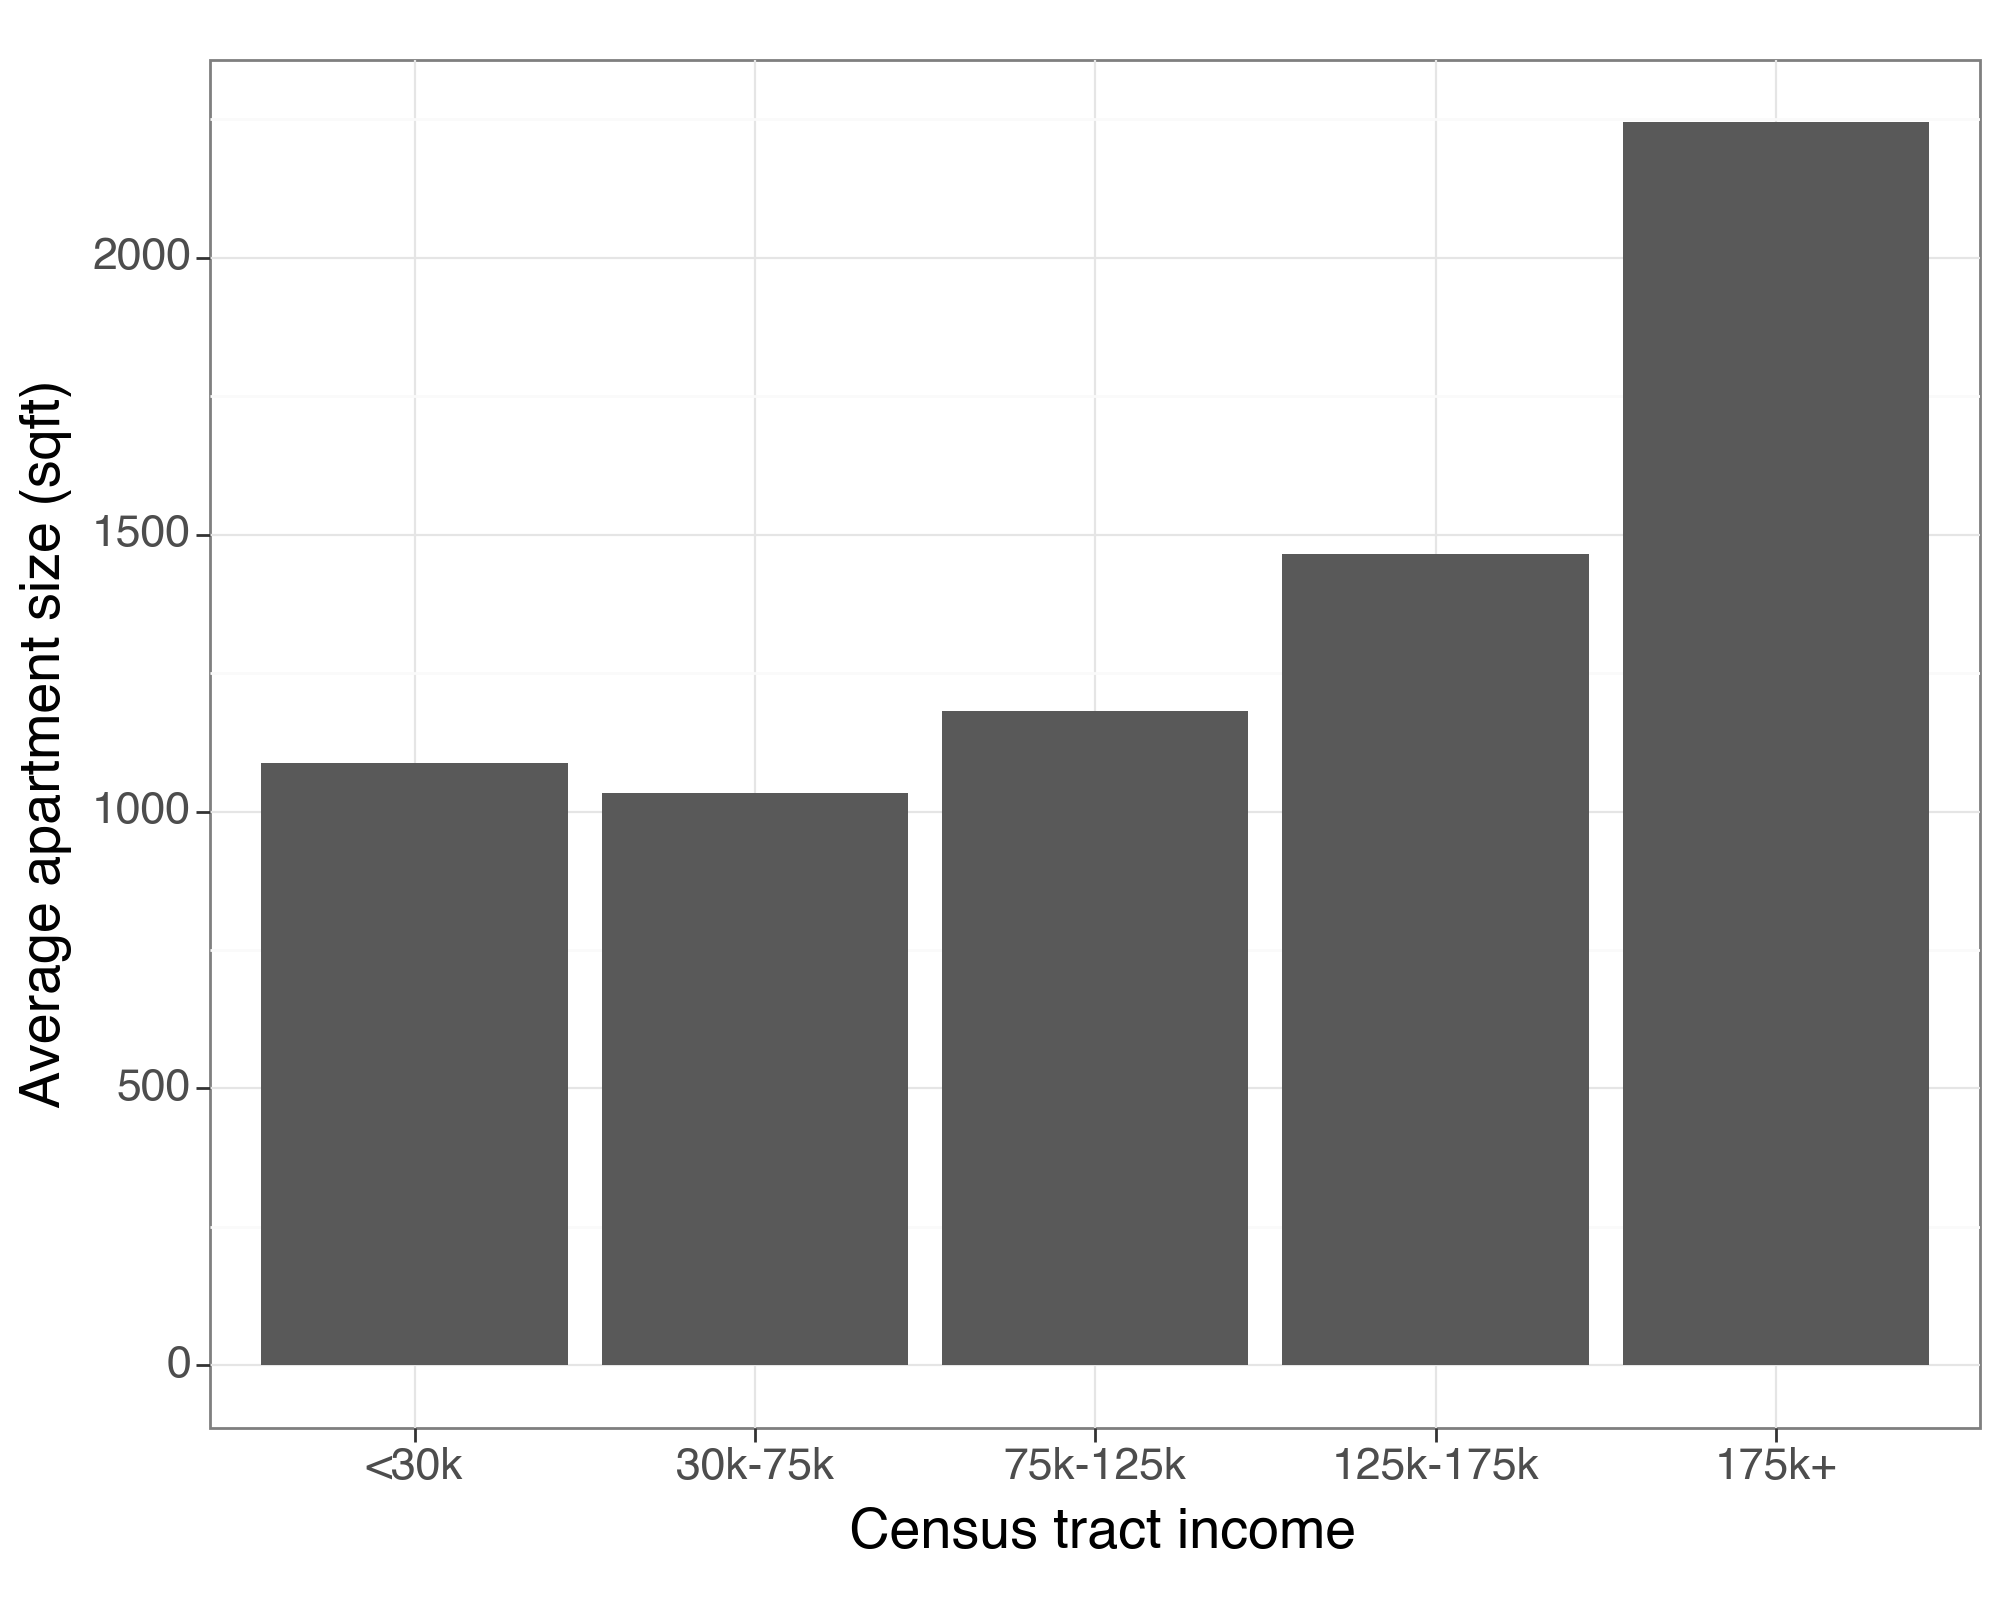

<Figure Size: (1000 x 800)>

In [ ]:
(ggplot(ghg.groupby("income_bin")["avg_apt_size"].mean().reset_index(), aes(x = "income_bin", y = "avg_apt_size")) + geom_bar(stat = "identity") + 
 labs(y = "Average apartment size (sqft)", x = " Census tract income") +
 theme_bw(base_size= 20) +
 theme(figure_size=(10,8), legend_position="top"))

In [ ]:
plot_dat = ghg.groupby("decade_built").agg({"bottom_quint":"mean", "top_quint": "mean", "bbl":"nunique", "total_units" : "sum", "total_fa" : "sum"}).reset_index().query("bbl > 50")
plot_dat["avg_apt_size"] = plot_dat["total_fa"] / plot_dat["total_units"] 
(ggplot(plot_dat, aes(x = "decade_built", y = "top_quint", group = "decade_built")) + geom_point() + geom_line())

In [ ]:
(ggplot(plot_dat, aes(x = "decade_built", y = "avg_apt_size")) + geom_point() + geom_line())

In [ ]:
plot_dat = ghg.groupby(["decade_built", "apt_size_cat"]).agg({"bottom_quint":"mean", "top_quint": "mean", "bbl":"nunique", "total_units" : "sum", "total_fa" : "sum"}).reset_index().query("bbl > 30")
(ggplot(plot_dat, aes(x = "decade_built", y = "bottom_quint", color = "apt_size_cat")) + geom_point() + geom_line())

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 185 rows containing non-finite values.


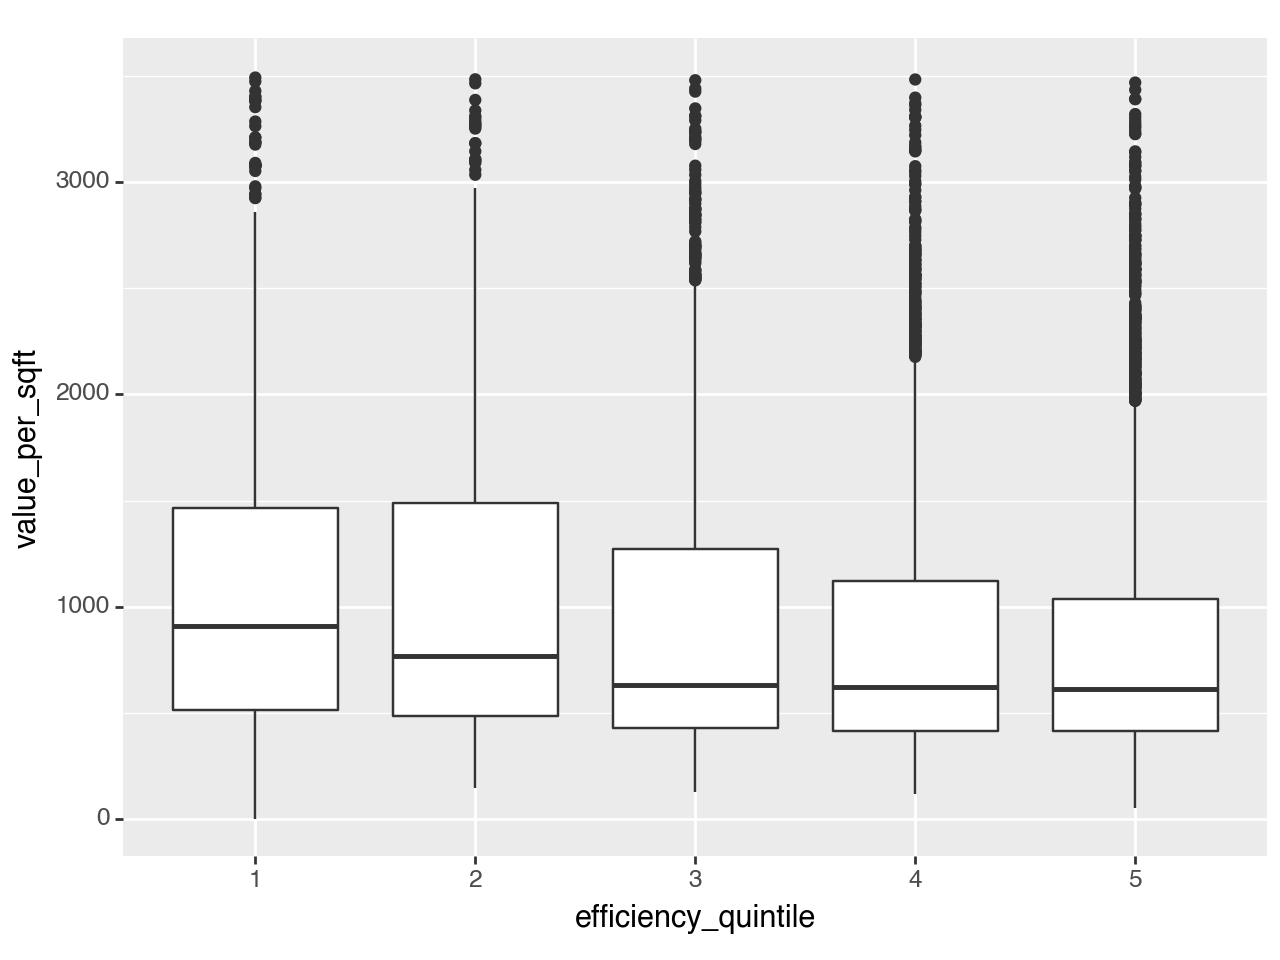

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(ghg, aes(x = "efficiency_quintile", y = "value_per_sqft")) + geom_boxplot() + ylim(0, 3500))

In [ ]:
ghg.value_per_sqft

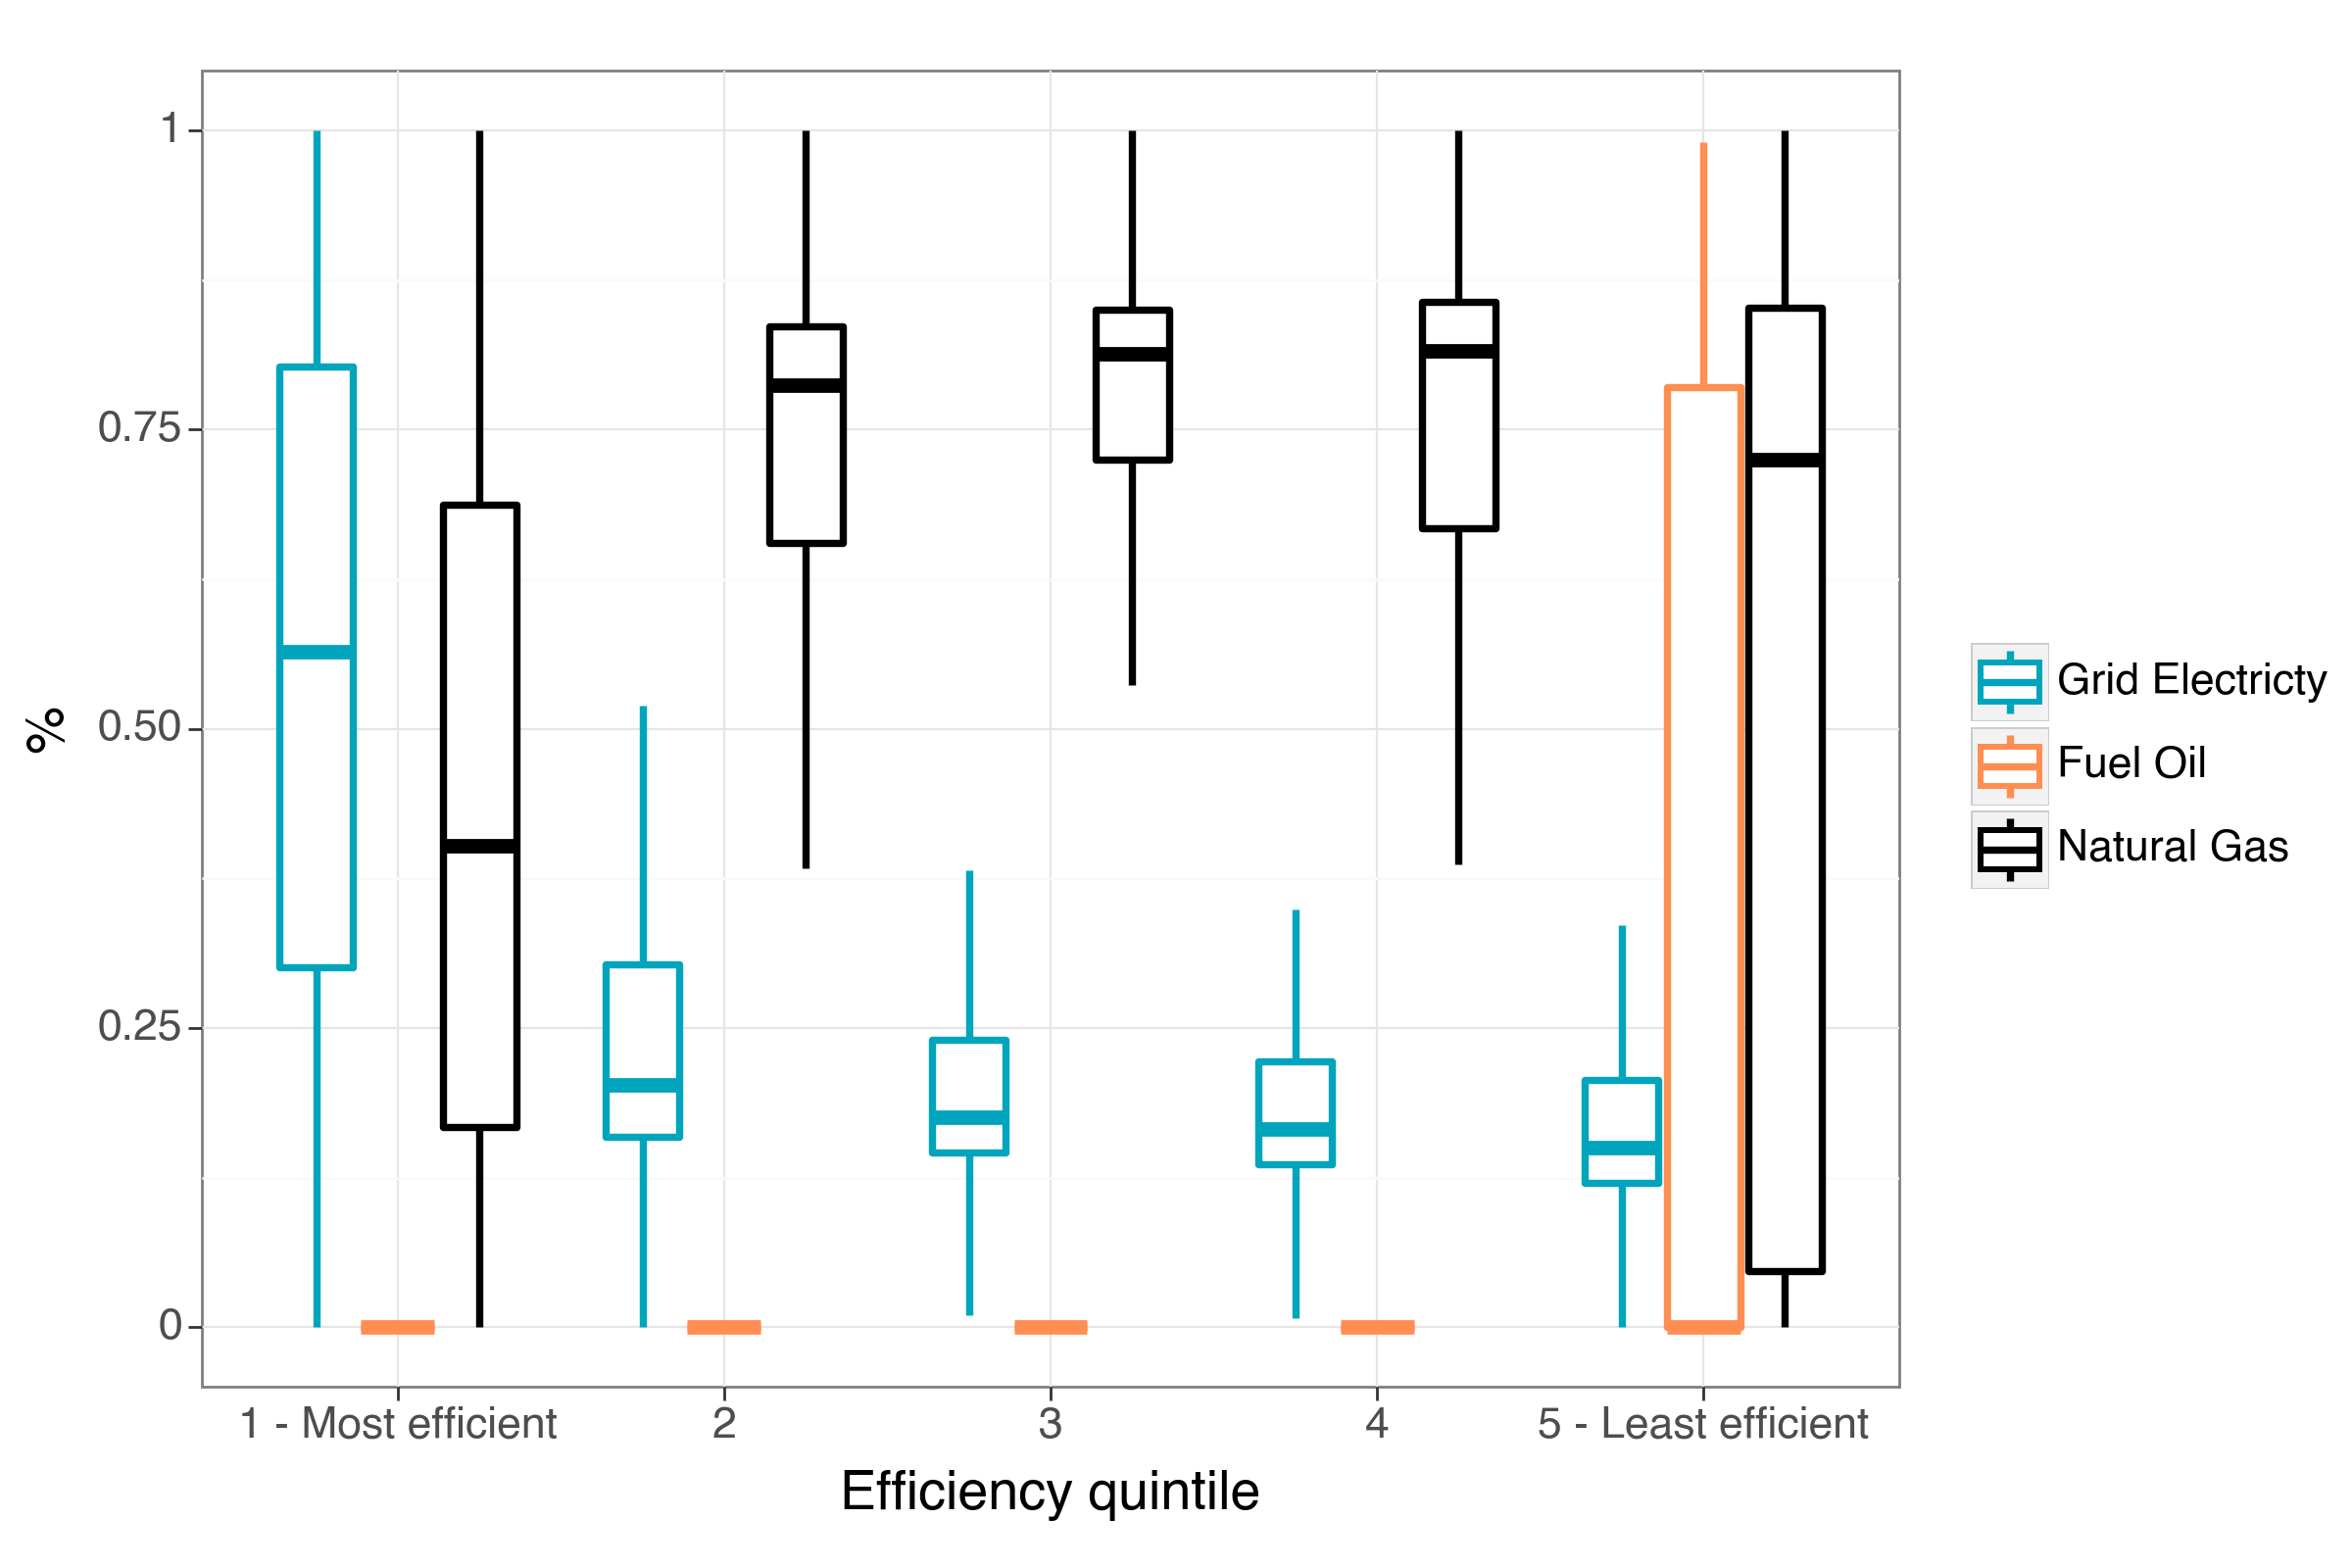

<Figure Size: (1200 x 800)>

In [ ]:
energy_pct_cols = [col for col in ghg.columns if col.endswith("energy_pct")]
plot_dat = ghg[["efficiency_quintile"] + energy_pct_cols].melt(id_vars = "efficiency_quintile")

(ggplot(plot_dat.query("variable !=  'district_steam_energy_pct'"), aes(x = "efficiency_quintile", y = "value", color = "variable")) +
 geom_boxplot(outlier_shape = '', size = 1.5) +
 scale_color_manual(name = " ", values = ["#00a5bd", "#ff8e52", "#000000"], labels = ["Grid Electricty", "Fuel Oil", "Natural Gas"]) +
 labs(y = "%", x = "Efficiency quintile") +
 scale_x_discrete(labels =  ["1 - Most efficient", "2", "3", "4", "5 - Least efficient"]) + 
 theme_bw(base_size= 20) +
 theme(figure_size=(12,8), legend_position="right"))

In [ ]:
formula = 'co2_per_apt ~ fuel_oil_energy_pct + electricity_energy_pct + apt_size_cat + year_built'

# Fit the logistic regression model
model = smf.ols(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            co2_per_apt   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     168.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          4.16e-241
Time:                        12:29:29   Log-Likelihood:                -60132.
No. Observations:               16183   AIC:                         1.203e+05
Df Residuals:                   16175   BIC:                         1.203e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Define the formula (R-style formula)
ghg['y'] = ghg["bottom_quint"].astype(int)
formula = 'y ~ fuel_oil_energy_pct + electricity_energy_pct + apt_size_cat + year_built + income_bin'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.389084
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16183
Model:                          Logit   Df Residuals:                    16171
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.2133
Time:                        15:24:56   Log-Likelihood:                -6296.6
converged:                       True   LL-Null:                       -8003.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.8105      1.696      4.017      0.000   

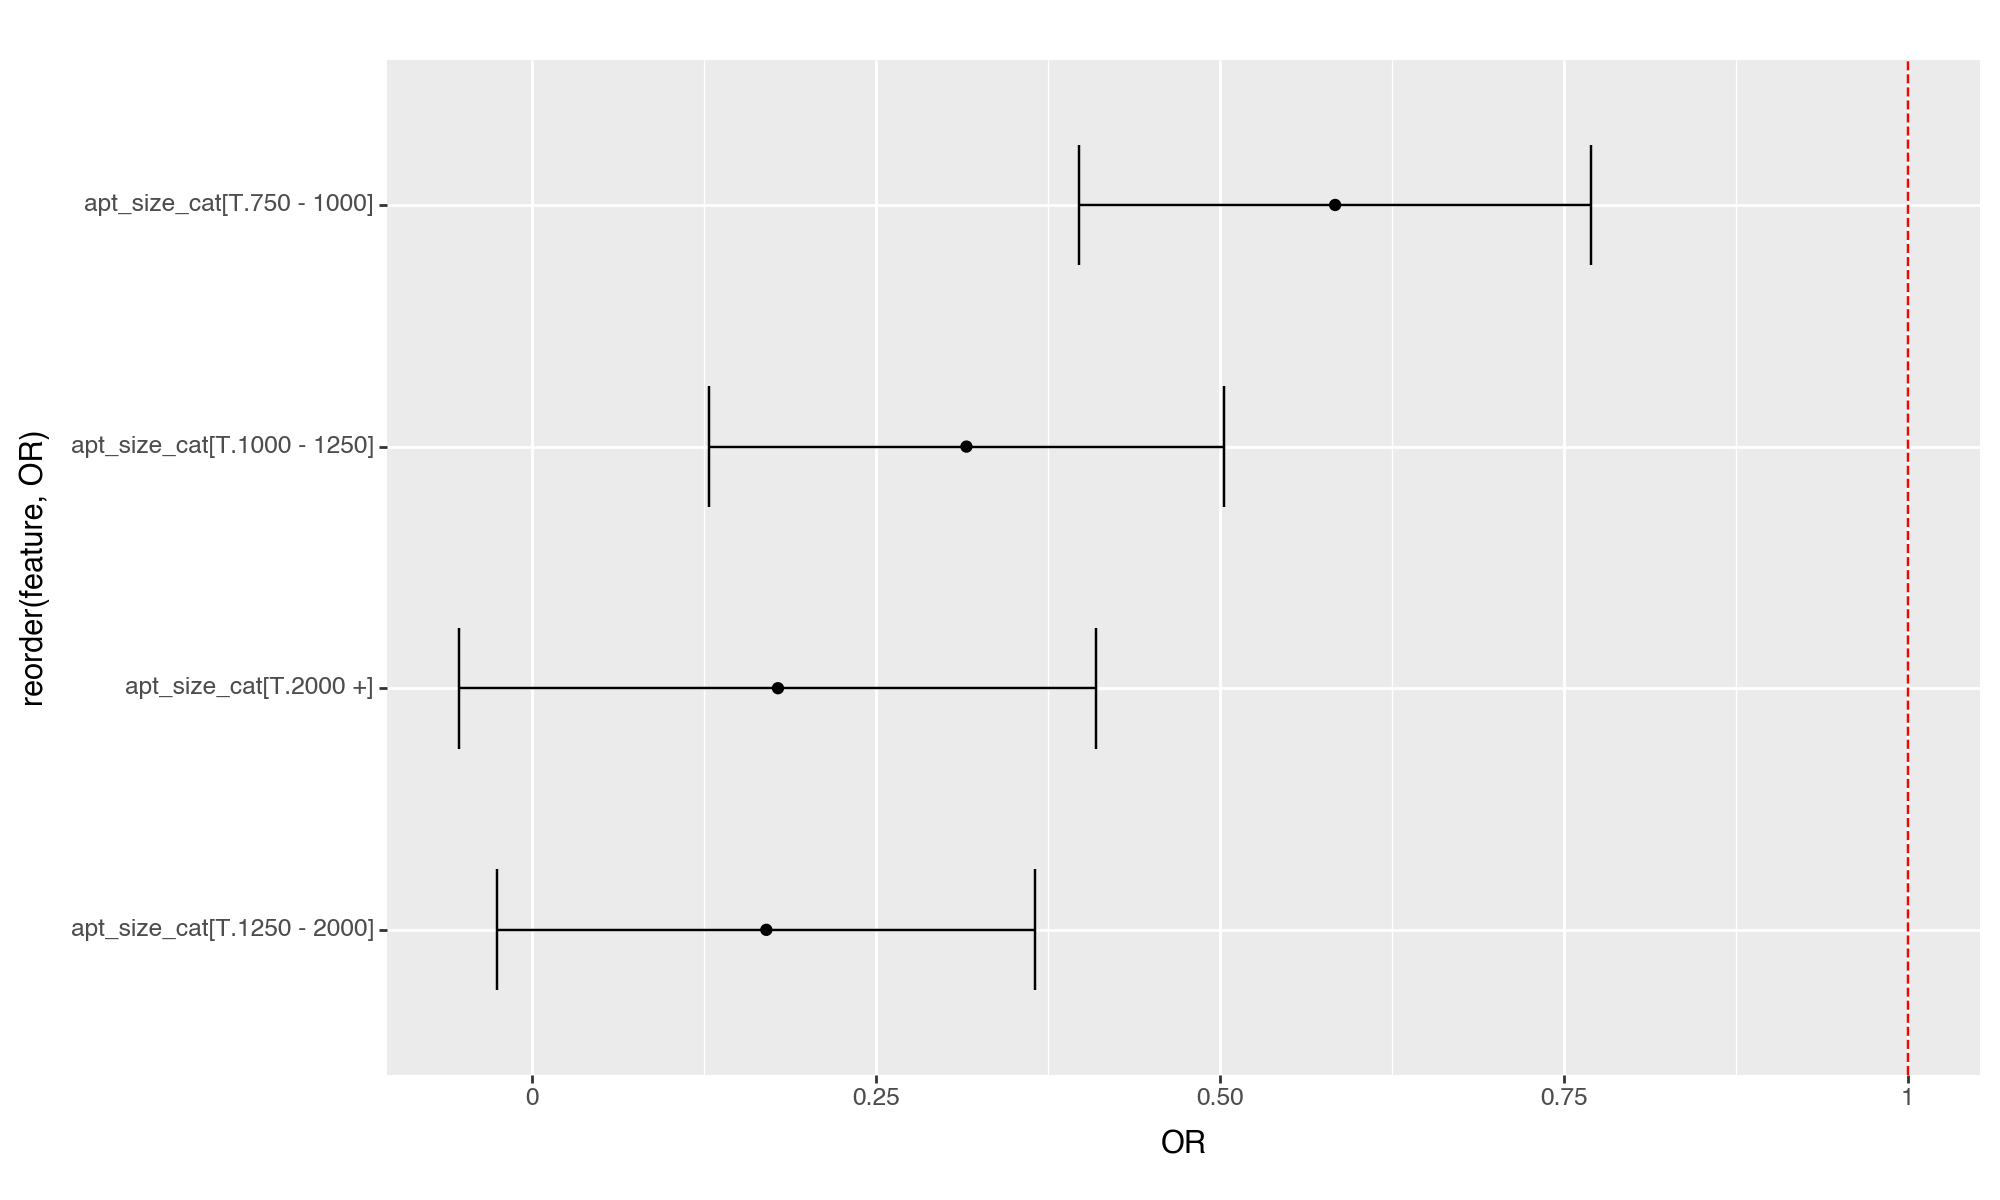

<Figure Size: (1000 x 600)>

In [ ]:
plot_dat = extract_odds_ratios_se(model)
plot_odds_ratios_ggplot(plot_dat[plot_dat['feature'].str.startswith("apt_size")])

In [ ]:
formula = 'y ~ income_bin'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.488504
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16183
Model:                          Logit   Df Residuals:                    16178
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.01224
Time:                        15:21:54   Log-Likelihood:                -7905.5
converged:                       True   LL-Null:                       -8003.4
Covariance Type:            nonrobust   LLR p-value:                 2.868e-41
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.9457      0.056    -16.740      0.000      -1.056   

In [ ]:
formula = 'y ~ income_bin + avg_apt_size'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.478570
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16183
Model:                          Logit   Df Residuals:                    16177
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.03233
Time:                        15:22:36   Log-Likelihood:                -7744.7
converged:                       True   LL-Null:                       -8003.4
Covariance Type:            nonrobust   LLR p-value:                1.378e-109
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0296      0.085      0.348      0.728      -0.137   

In [ ]:
formula = 'y ~ direct_emission_pct'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

In [ ]:
formula = 'y ~ + apt_size_cat'

# Fit the logistic regression model
model = smf.logit(formula, data=ghg.dropna()).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.584159
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                16183
Model:                          Logit   Df Residuals:                    16174
Method:                           MLE   Df Model:                            8
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                 0.04315
Time:                        21:49:42   Log-Likelihood:                -9453.4
converged:                       True   LL-Null:                       -9879.8
Covariance Type:            nonrobust   LLR p-value:                9.293e-179
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6532      0.089     18.517      0.000   

In [ ]:
def plot_odds_ratios_ggplot(df):
    df = df.sort_values(by='OR', ascending=False)
    df['lower'] = df['OR'] - 1.96 * df['se']
    df['upper'] = df['OR'] + 1.96 * df['se']
    
    p = (ggplot(df, aes(y='reorder(feature, OR)', x='OR')) 
         + geom_point() 
         + geom_errorbarh(aes(xmin='lower', xmax='upper')) 
         + geom_vline(xintercept=1, color='red', linetype='--') 
         + theme(figure_size=(10, 6)))

    return p

In [ ]:
def extract_odds_ratios_se(model):
    params = model.params
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'OR']
    conf['se'] = (conf['Upper CI'] - conf['Lower CI']) / (2 * 1.96) # Approximate standard error
    conf['OR'] = np.exp(conf['OR'])
    conf.reset_index(inplace=True)
    conf.rename(columns={'index': 'feature'}, inplace=True)
    return conf[['feature', 'OR', 'se']]


In [ ]:
extract_odds_ratios_se(model)

,feature,OR,se
0,Intercept,126.653496,1.315285e+00
1,apt_size_cat[T.750 - 1000],0.583685,9.485221e-02
2,apt_size_cat[T.1000 - 1250],0.315573,9.553035e-02
3,apt_size_cat[T.1250 - 2000],0.170062,9.985113e-02
4,apt_size_cat[T.2000 +],0.178515,1.181663e-01
5,natural_gas_energy_pct,0.099010,2.781153e-01
6,fuel_oil_energy_pct,0.794407,3.065457e-01
7,electricity_energy_pct,0.000318,3.054995e-01
8,year_built,0.999970,6.584709e-04
9,value_per_sqft,1.000005,2.354259e-05


/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_smooth : Removed 21 rows containing missing values.


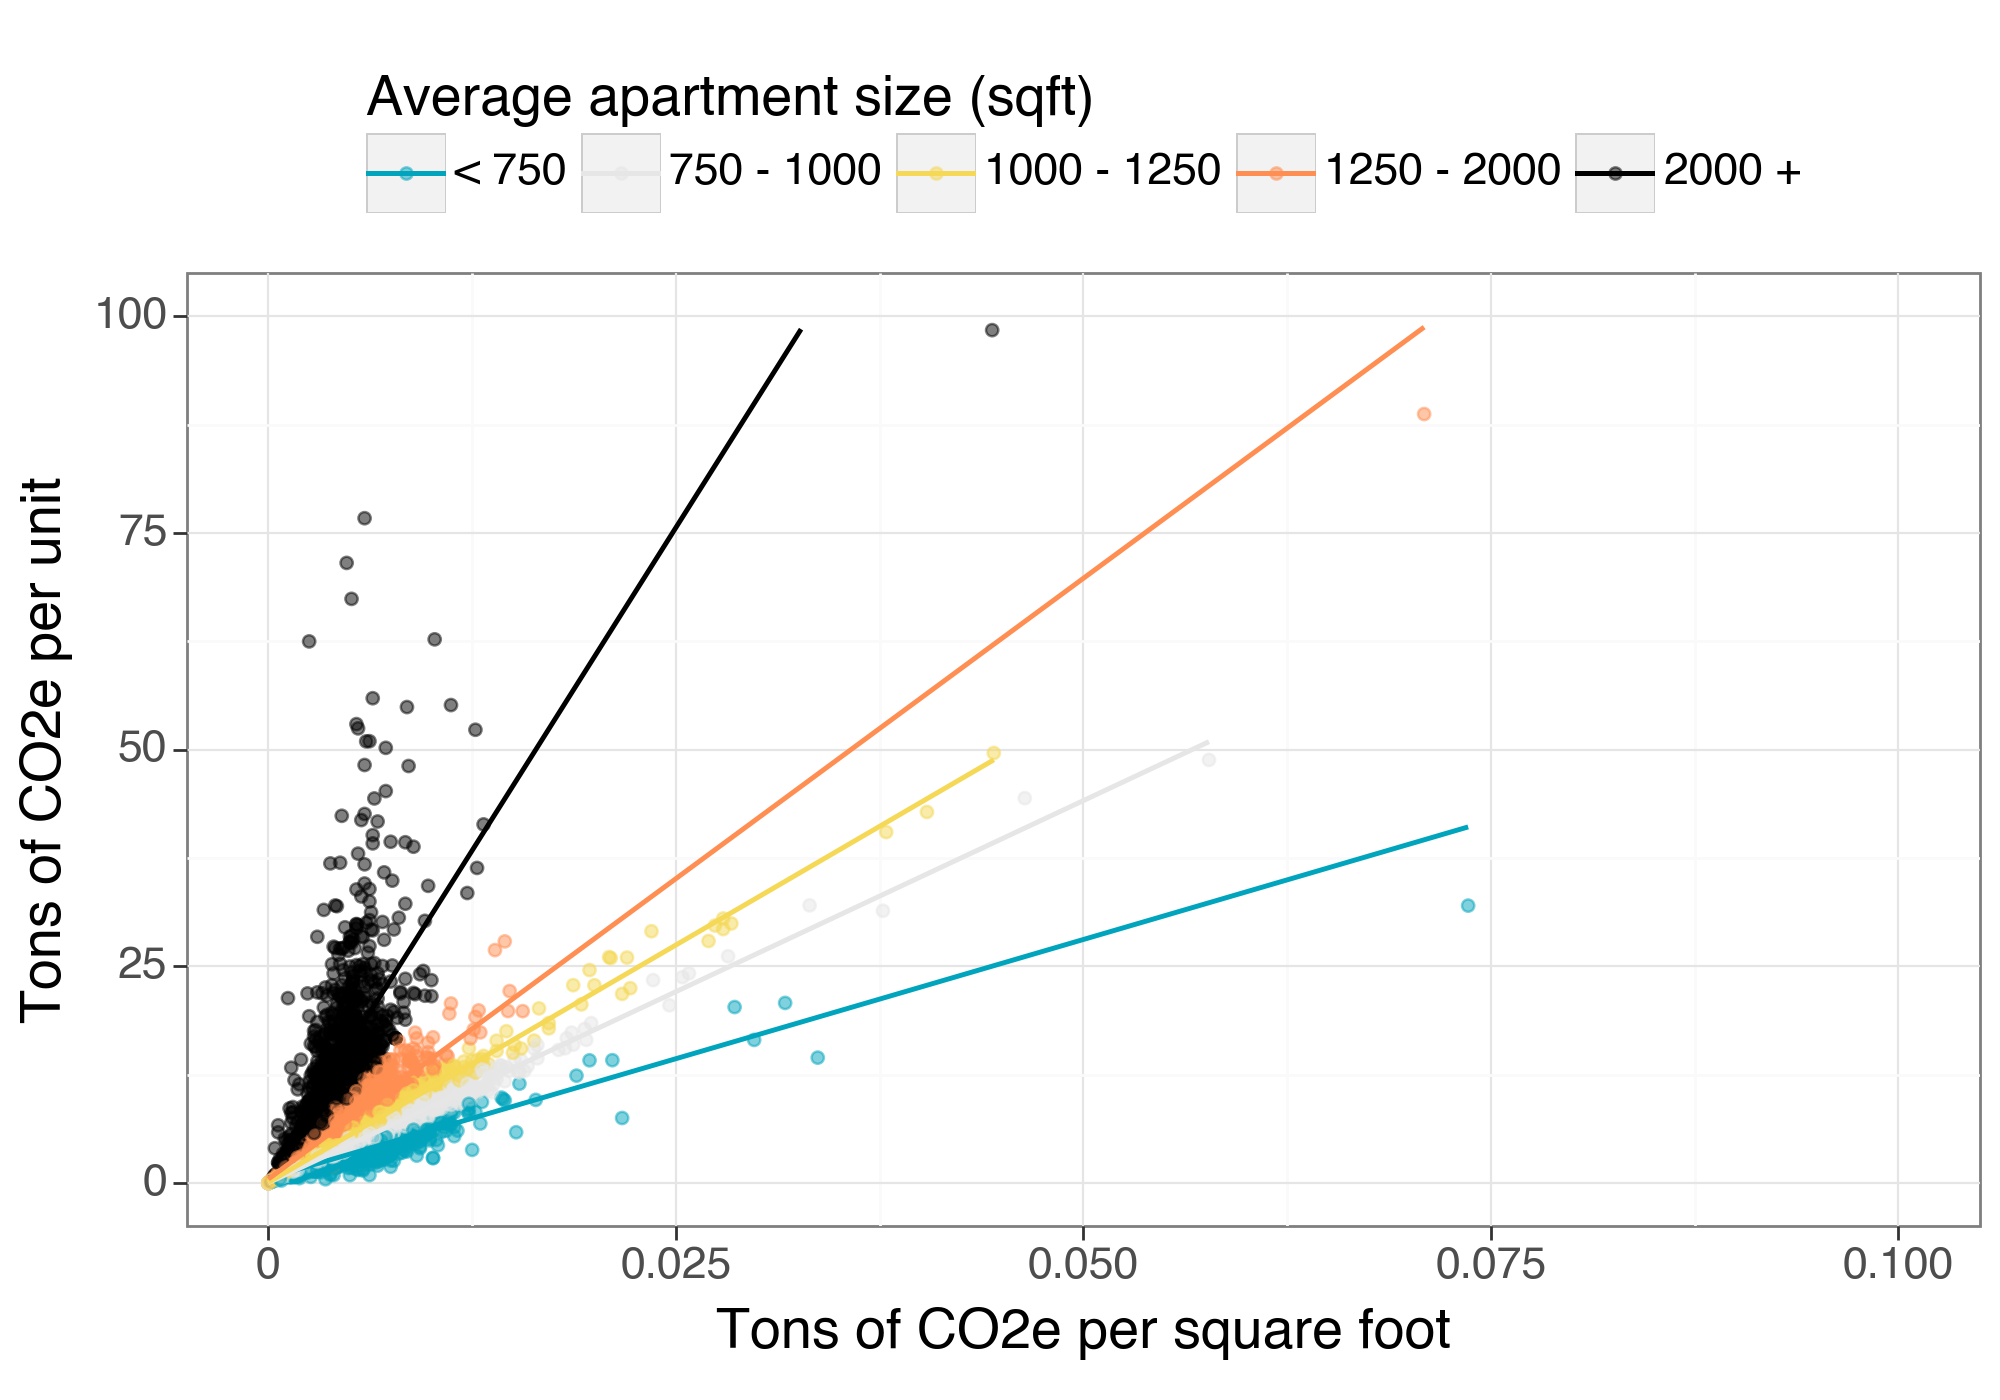

<Figure Size: (1000 x 700)>

In [24]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt", color = "apt_size_cat")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.1) +
 ylim(0, 100) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit") +
 scale_color_manual(name = "Average apartment size (sqft)", values = colors) 
)

/Users/canyonfoot/Documents/python_proj/Building-Emissions/.venv/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


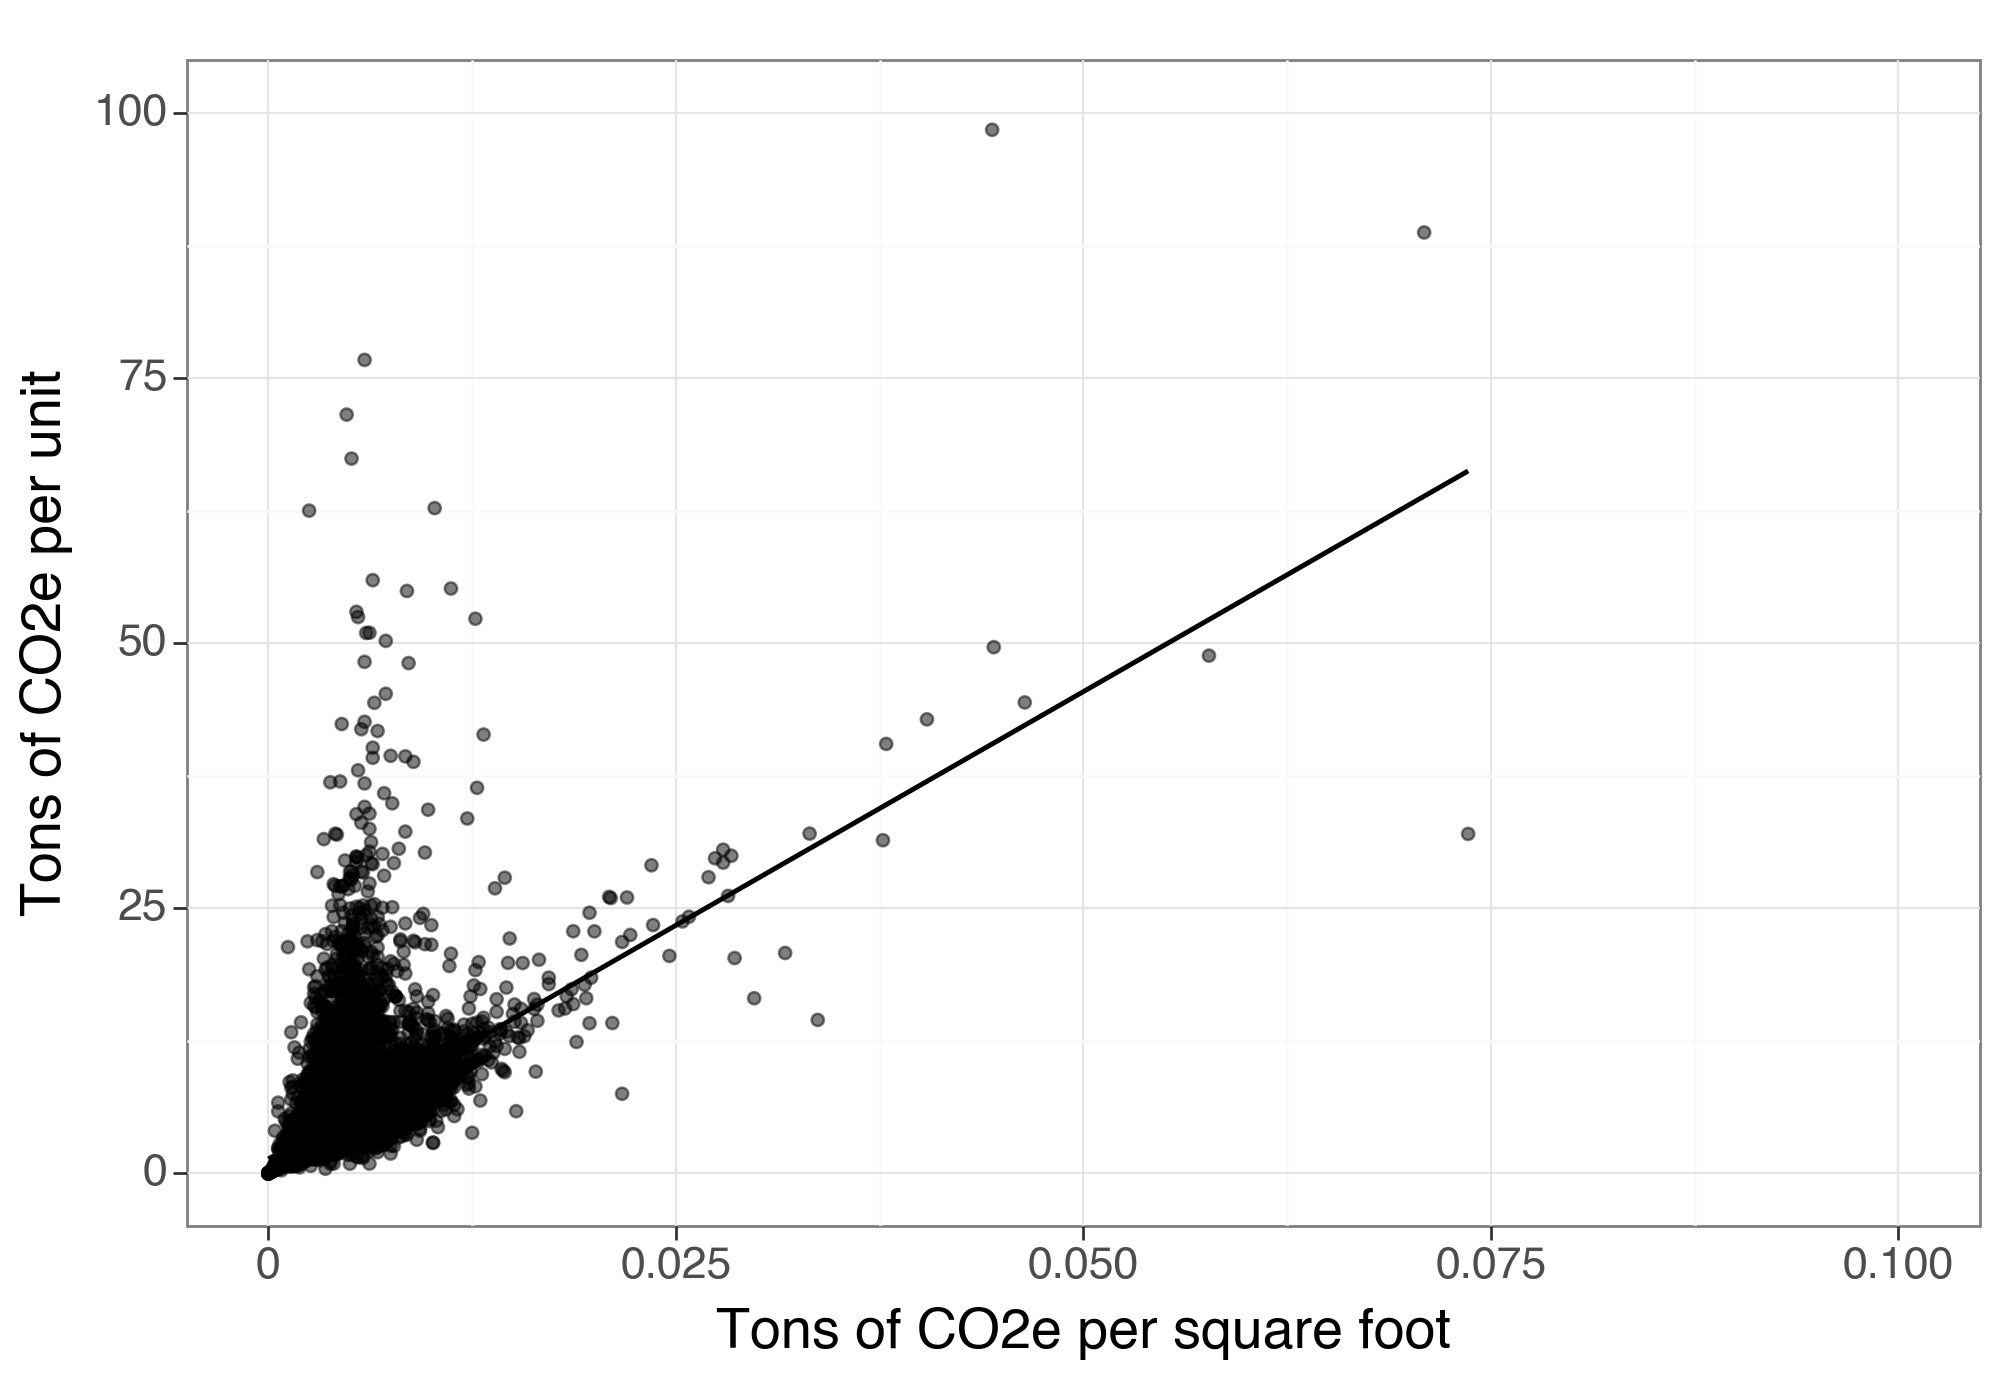

<Figure Size: (1000 x 700)>

In [49]:
(ggplot(ghg, aes(x = "co2_tons_sq", y = "co2_per_apt")) + 
 geom_point(alpha = .5, size = 2) +
 geom_smooth(method = "lm", se = False, size = 1) +
 #geom_vline(xintercept = .0067, linetype = 'dashed', color = 'black', size = 1) +
 theme_bw(base_size=20) +
 theme(figure_size = (10,7), legend_position= "top") + 
 xlim(0, 0.1) +
 ylim(0, 100) +
 labs(x = "Tons of CO2e per square foot", y = "Tons of CO2e per unit") )